# **Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from statistics import mode
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

**E-CommerceU Dataset loading to Google Colaboratory :**

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1p2Qhqy14urnmV6xWY5gWyv8P0IofQ2IwcP-yHV3cPCM/edit#gid=1283768639'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_prep = pd.read_csv(sheet_url_trf)
df_prep.head(5)


User_Id                     User_Name Register_Date Gender     Province  \
0    10084              Tasdik Sihombing     2/27/2019   male  DKI Jakarta   
1    10005  Pranata Lega Firgantoro S.Pt     9/21/2019   male  DKI Jakarta   
2    10007             Bancar Firgantoro     1/29/2019   male  Jawa Tengah   
3    10006            Slamet Nashiruddin     8/10/2019   male       Banten   
4    10013               Banara Sitompul     8/21/2019   male  Jawa Tengah   

              City First_Activity Last_Activity    Max_Date  Transactions  \
0    South Jakarta      2/27/2019    10/28/2021  12/30/2021            42   
1  Jakarta Selatan      9/22/2019     9/21/2021  12/30/2021            30   
2         Semarang       2/1/2019    12/28/2021  12/30/2021            30   
3   Kota Tangerang     10/10/2019    10/28/2021  12/30/2021            27   
4         Semarang      8/21/2019    12/11/2021  12/30/2021            27   

   Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0       1               76444             184  14475000            10   
1       1               90909             102   9445000             4   
2       0               94667             123  10135000            10   
3       3              112083             108  12635000            16   
4       0               86667             141  10040000             3   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit Conversion_Rate  \
0               0  14625000  344643              25           0,560   
1               0   9620000  314833              26           0,385   
2               0  10310000  337833              30           0,333   
3               0  12710000  467963              24           0,375   
4               0  10190000  371852              21           0,429   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   
1          200000             8            9      18           6         0   
2          175000             7           15      12           3         0   
3          125000             5            9       6          21         0   
4          150000             6            9      15           3         0   

   NumdebCard  
0           3  
1           0  
2           0  
3           0  
4           0

## **Raw Dataset Identification - For Analysis**

In [ ]:
row,column = df_prep.shape

print("Number of rows in the dataset      :", row)
print("Number of columns in the dataset   :", column)

Number of rows in the dataset      : 1998
Number of columns in the dataset   : 35


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   User_Id               1998 non-null   int64 
 1   User_Name             1998 non-null   object
 2   Register_Date         1998 non-null   object
 3   Gender                1998 non-null   object
 4   Province              1998 non-null   object
 5   City                  1998 non-null   object
 6   First_Activity        1998 non-null   object
 7   Last_Activity         1998 non-null   object
 8   Max_Date              1998 non-null   object
 9   Transactions          1998 non-null   int64 
 10  Cancel                1998 non-null   int64 
 11  AVG_Price_Per_Cust    1998 non-null   int64 
 12  Sales_Quantity        1998 non-null   int64 
 13  Revenue               1998 non-null   int64 
 14  Cloth_Amount          1998 non-null   int64 
 15  Groceries_Amount      1998 non-null   

**Attributes with categorical data types :**

In [ ]:
df_ident_cat = (df_prep. dtypes == 'object')
object_columns = list(df_ident_cat[df_ident_cat].index)

print("Attributes with categorical data types :", object_columns)

Attributes with categorical data types : ['User_Name', 'Register_Date', 'Gender', 'Province', 'City', 'First_Activity', 'Last_Activity', 'Max_Date', 'Conversion_Rate']


**Attributes with numerical data types :**

In [ ]:
df_ident_num = (df_prep. dtypes == 'int64')
int_columns = list(df_ident_num[df_ident_num].index)

print("Attributes with numerical data types :", int_columns)

Attributes with numerical data types : ['User_Id', 'Transactions', 'Cancel', 'AVG_Price_Per_Cust', 'Sales_Quantity', 'Revenue', 'Cloth_Amount', 'Groceries_Amount', 'Stationary_Amount', 'Game_Amount', 'Health_Beauty_Amount', 'Mother_Care_Amount', 'Sport_equipt_Amount', 'Shoes_Amont', 'Electronics_Amount', 'Hobbies_Amount', 'GMV', 'AOV', 'Customer_Visit', 'Voucher_Amount', 'Voucher_Used', 'NumPayLater', 'NumTrf', 'NumEWallet', 'NumCCard', 'NumdebCard']


**Attributes with float data types :**

In [ ]:
df_ident_num = (df_prep. dtypes == 'float64')
int_columns = list(df_ident_num[df_ident_num].index)

print("Attributes with numerical data types :", int_columns)

Attributes with numerical data types : []


**Looking for categorical attributes in dataset :**

In [ ]:
df_cat = df_prep[['User_Name', 'Register_Date', 'Gender', 'Province', 'City', 'First_Activity', 'Last_Activity', 'Max_Date', 'Conversion_Rate']]
df_cat.head()

User_Name Register_Date Gender     Province  \
0              Tasdik Sihombing     2/27/2019   male  DKI Jakarta   
1  Pranata Lega Firgantoro S.Pt     9/21/2019   male  DKI Jakarta   
2             Bancar Firgantoro     1/29/2019   male  Jawa Tengah   
3            Slamet Nashiruddin     8/10/2019   male       Banten   
4               Banara Sitompul     8/21/2019   male  Jawa Tengah   

              City First_Activity Last_Activity    Max_Date Conversion_Rate  
0    South Jakarta      2/27/2019    10/28/2021  12/30/2021           0,560  
1  Jakarta Selatan      9/22/2019     9/21/2021  12/30/2021           0,385  
2         Semarang       2/1/2019    12/28/2021  12/30/2021           0,333  
3   Kota Tangerang     10/10/2019    10/28/2021  12/30/2021           0,375  
4         Semarang      8/21/2019    12/11/2021  12/30/2021           0,429

**Looking for numerical (Int) attributes in dataset :**

In [ ]:
df_num = df_prep[['User_Id', 'Cancel', 'Cloth_Amount', 'Groceries_Amount', 'Stationary_Amount', 'Game_Amount', 'Health_Beauty_Amount', 'Mother_Care_Amount', 'Sport_equipt_Amount', 'Shoes_Amont', 'Electronics_Amount', 'Hobbies_Amount', 'Customer_Visit', 'NumPayLater', 'NumTrf', 'NumEWallet', 'NumCCard', 'NumdebCard']]
df_num.head()

User_Id  Cancel  Cloth_Amount  Groceries_Amount  Stationary_Amount  \
0    10084       1            10                10                  9   
1    10005       1             4                 7                  6   
2    10007       0            10                 6                  5   
3    10006       3            16                11                  0   
4    10013       0             3                11                  7   

   Game_Amount  Health_Beauty_Amount  Mother_Care_Amount  Sport_equipt_Amount  \
0            0                    10                   6                    0   
1            0                    10                   6                    0   
2            0                     4                   5                    0   
3            0                     7                   2                    0   
4            0                     4                   2                    0   

   Shoes_Amont  Electronics_Amount  Hobbies_Amount  Customer_Visit  \
0            0                   0               0              25   
1            0                   0               0              26   
2            0                   0               0              30   
3            0                   0               0              24   
4            0                   0               0              21   

   NumPayLater  NumTrf  NumEWallet  NumCCard  NumdebCard  
0            3      12          21         6           3  
1            9      18           6         0           0  
2           15      12           3         0           0  
3            9       6          21         0           0  
4            9      15           3         0           0

**Looking for numerical (float) attributes in dataset :**

In [ ]:
df_flt = df_prep[['Transactions', 'AVG_Price_Per_Cust', 'Sales_Quantity', 'Revenue', 'GMV', 'AOV', 'Voucher_Amount', 'Voucher_Used']]
df_flt.head()

Transactions  AVG_Price_Per_Cust  Sales_Quantity   Revenue       GMV  \
0            42               76444             184  14475000  14625000   
1            30               90909             102   9445000   9620000   
2            30               94667             123  10135000  10310000   
3            27              112083             108  12635000  12710000   
4            27               86667             141  10040000  10190000   

      AOV  Voucher_Amount  Voucher_Used  
0  344643          175000             7  
1  314833          200000             8  
2  337833          175000             7  
3  467963          125000             5  
4  371852          150000             6

In [ ]:
df_prep2 = df_prep.copy()

In [ ]:
df_prep2.head(5)

User_Id                     User_Name Register_Date Gender     Province  \
0    10084              Tasdik Sihombing     2/27/2019   male  DKI Jakarta   
1    10005  Pranata Lega Firgantoro S.Pt     9/21/2019   male  DKI Jakarta   
2    10007             Bancar Firgantoro     1/29/2019   male  Jawa Tengah   
3    10006            Slamet Nashiruddin     8/10/2019   male       Banten   
4    10013               Banara Sitompul     8/21/2019   male  Jawa Tengah   

              City First_Activity Last_Activity    Max_Date  Transactions  \
0    South Jakarta      2/27/2019    10/28/2021  12/30/2021            42   
1  Jakarta Selatan      9/22/2019     9/21/2021  12/30/2021            30   
2         Semarang       2/1/2019    12/28/2021  12/30/2021            30   
3   Kota Tangerang     10/10/2019    10/28/2021  12/30/2021            27   
4         Semarang      8/21/2019    12/11/2021  12/30/2021            27   

   Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0       1               76444             184  14475000            10   
1       1               90909             102   9445000             4   
2       0               94667             123  10135000            10   
3       3              112083             108  12635000            16   
4       0               86667             141  10040000             3   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit Conversion_Rate  \
0               0  14625000  344643              25           0,560   
1               0   9620000  314833              26           0,385   
2               0  10310000  337833              30           0,333   
3               0  12710000  467963              24           0,375   
4               0  10190000  371852              21           0,429   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   
1          200000             8            9      18           6         0   
2          175000             7           15      12           3         0   
3          125000             5            9       6          21         0   
4          150000             6            9      15           3         0   

   NumdebCard  
0           3  
1           0  
2           0  
3           0  
4           0

## **Cleaning The Dataset**

In [ ]:
df_clean = df_prep2.copy()

### **Missing Data - For Analysis**

In [ ]:
df_missing = df_clean.copy()

In [ ]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   User_Id               1998 non-null   int64 
 1   User_Name             1998 non-null   object
 2   Register_Date         1998 non-null   object
 3   Gender                1998 non-null   object
 4   Province              1998 non-null   object
 5   City                  1998 non-null   object
 6   First_Activity        1998 non-null   object
 7   Last_Activity         1998 non-null   object
 8   Max_Date              1998 non-null   object
 9   Transactions          1998 non-null   int64 
 10  Cancel                1998 non-null   int64 
 11  AVG_Price_Per_Cust    1998 non-null   int64 
 12  Sales_Quantity        1998 non-null   int64 
 13  Revenue               1998 non-null   int64 
 14  Cloth_Amount          1998 non-null   int64 
 15  Groceries_Amount      1998 non-null   

**Attributes with categorical and numerical data types :**

In [ ]:
# df_ident_cat = (df_missing. dtypes == 'object')
# object_columns = list(df_ident_cat[df_ident_cat].index)

# print("Attributes with categorical data types :\n", object_columns)

# print('\n')

# df_ident_num = (df_missing. dtypes == 'int64')
# int_columns = list(df_ident_num[df_ident_num].index)

# print("Attributes with numerical data types :\n", int_columns)

In [ ]:
print("Jumlah attribut pada customers_dataset yang memiliki nilai null adalah sebanyak:",df_missing.isna().any().sum(), "Variabel")

Jumlah attribut pada customers_dataset yang memiliki nilai null adalah sebanyak: 0 Variabel


In [ ]:
df_info = pd.DataFrame(df_missing.dtypes).T.rename(index={0:'column type'})
df_info = df_info.append(pd.DataFrame(df_missing.isnull().sum()).T.rename(index={0:'null values (nb)'}))
df_info = df_info.append(pd.DataFrame(df_missing.isnull().sum()/df_missing.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(df_info)

User_Id User_Name Register_Date  Gender Province    City  \
column type        int64    object        object  object   object  object   
null values (nb)       0         0             0       0        0       0   
null values (%)      0.0       0.0           0.0     0.0      0.0     0.0   

                 First_Activity Last_Activity Max_Date Transactions Cancel  \
column type              object        object   object        int64  int64   
null values (nb)              0             0        0            0      0   
null values (%)             0.0           0.0      0.0          0.0    0.0   

                 AVG_Price_Per_Cust Sales_Quantity Revenue Cloth_Amount  \
column type                   int64          int64   int64        int64   
null values (nb)                  0              0       0            0   
null values (%)                 0.0            0.0     0.0          0.0   

                 Groceries_Amount Stationary_Amount Game_Amount  \
column type                 int64             int64       int64   
null values (nb)                0                 0           0   
null values (%)               0.0               0.0         0.0   

                 Health_Beauty_Amount Mother_Care_Amount Sport_equipt_Amount  \
column type                     int64              int64               int64   
null values (nb)                    0                  0                   0   
null values (%)                   0.0                0.0                 0.0   

                 Shoes_Amont Electronics_Amount Hobbies_Amount    GMV    AOV  \
column type            int64              int64          int64  int64  int64   
null values (nb)           0                  0              0      0      0   
null values (%)          0.0                0.0            0.0    0.0    0.0   

                 Customer_Visit Conversion_Rate Voucher_Amount Voucher_Used  \
column type               int64          object          int64        int64   
null values (nb)              0               0              0            0   
null values (%)             0.0             0.0            0.0          0.0   

                 NumPayLater NumTrf NumEWallet NumCCard NumdebCard  
column type            int64  int64      int64    int64      int64  
null values (nb)           0      0          0        0          0  
null values (%)          0.0    0.0        0.0      0.0        0.0

In [ ]:
df_missing.dropna(axis=0, inplace = True)

In [ ]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1997
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   User_Id               1998 non-null   int64 
 1   User_Name             1998 non-null   object
 2   Register_Date         1998 non-null   object
 3   Gender                1998 non-null   object
 4   Province              1998 non-null   object
 5   City                  1998 non-null   object
 6   First_Activity        1998 non-null   object
 7   Last_Activity         1998 non-null   object
 8   Max_Date              1998 non-null   object
 9   Transactions          1998 non-null   int64 
 10  Cancel                1998 non-null   int64 
 11  AVG_Price_Per_Cust    1998 non-null   int64 
 12  Sales_Quantity        1998 non-null   int64 
 13  Revenue               1998 non-null   int64 
 14  Cloth_Amount          1998 non-null   int64 
 15  Groceries_Amount      1998 non-null   

### **Typos - For Analysis**

In [ ]:
df_typos = df_missing.copy()

In [ ]:
df_typos.nunique()

User_Id                 1998
User_Name               1970
Register_Date            547
Gender                     2
Province                   5
City                      16
First_Activity           568
Last_Activity            441
Max_Date                   1
Transactions              28
Cancel                     7
AVG_Price_Per_Cust      1295
Sales_Quantity           109
Revenue                 1378
Cloth_Amount              14
Groceries_Amount          14
Stationary_Amount         11
Game_Amount                8
Health_Beauty_Amount      12
Mother_Care_Amount         9
Sport_equipt_Amount       12
Shoes_Amont               11
Electronics_Amount        10
Hobbies_Amount            10
GMV                     1334
AOV                     1628
Customer_Visit            31
Conversion_Rate          201
Voucher_Amount            15
Voucher_Used              15
NumPayLater               15
NumTrf                    18
NumEWallet                14
NumCCard                  13
NumdebCard    

> **Inference** :
> - There's no dataset has **TYPOS**

## **Duplicate - For Analysis**

In [ ]:
df_duplicate = df_typos.copy()

In [ ]:
df_duplicate.duplicated().sum()

0

In [ ]:
print("User_Name attribute has duplicate data (True or False) :", df_duplicate['User_Name'].duplicated().any())

User_Name attribute has duplicate data (True or False) : True


In [ ]:
df_duplicate['User_Name'].duplicated()

df_duplicate_ident = df_duplicate['User_Name'].duplicated(keep = False)
df_duplicate.loc[df_duplicate_ident].sort_values(by = 'User_Name', ascending = True)

User_Id                       User_Name Register_Date Gender  \
1858    10336                     Agus Widodo    10/10/2020   male   
504     11012                     Agus Widodo      2/7/2020   male   
862     11046  Anggabaya Maman Prasasta S.E.I      1/2/2019   male   
217     11071  Anggabaya Maman Prasasta S.E.I      2/1/2019   male   
294     11054        Arsipatra Prasetya M.TI.     1/15/2019   male   
892     11079        Arsipatra Prasetya M.TI.     1/20/2019   male   
1695    11049          Aslijan Wahyudin M.TI.     5/10/2019   male   
1083    11074          Aslijan Wahyudin M.TI.     2/26/2019   male   
1267    11043                  Bala Sihombing     6/10/2019   male   
1078    11068                  Bala Sihombing     8/17/2019   male   
854     11037             Bancar Umay Saptono    10/13/2019   male   
1700    11062             Bancar Umay Saptono     6/25/2019   male   
724     10073                   Cahya Siregar     7/10/2019   male   
80      10883                   Cahya Siregar     4/15/2019   male   
1072    11052                  Cayadi Suwarno      8/2/2019   male   
1843    11077                  Cayadi Suwarno     6/17/2020   male   
1066    11045                   Dono Marpaung     2/26/2019   male   
1079    11070                   Dono Marpaung     3/15/2019   male   
1265    11042         Gaduh Kajen Utama M.TI.     1/11/2019   male   
530     11067         Gaduh Kajen Utama M.TI.      1/1/2019   male   
1475    11040    Harsaya Eman Pangestu M.Farm     7/30/2019   male   
1491    11065    Harsaya Eman Pangestu M.Farm    10/15/2019   male   
1817    11039              Ismail Januar S.T.     2/20/2019   male   
1291    11064              Ismail Januar S.T.      9/8/2019   male   
1057    11032            Jayeng Pardi Mandala     11/5/2019   male   
869     11057            Jayeng Pardi Mandala     3/23/2019   male   
286     11038      Jono Bakiono Natsir S.Farm     1/17/2019   male   
702     11063      Jono Bakiono Natsir S.Farm     2/20/2019   male   
1300    11075                  Kacung Pranowo     9/13/2019   male   
688     11050                  Kacung Pranowo     6/26/2019   male   
1486    11059           Kalim Sihotang S.Farm     1/10/2021   male   
853     11034           Kalim Sihotang S.Farm     2/24/2019   male   
694     11055            Kemba Emas Saefullah     2/25/2019   male   
1504    11080            Kemba Emas Saefullah     9/26/2019   male   
533     11069              Kunthara Hidayanto     9/21/2019   male   
1064    11044              Kunthara Hidayanto      2/4/2019   male   
1494    11066                    Lega Prabowo      4/2/2019   male   
1263    11041                    Lega Prabowo     1/25/2019   male   
709     11076     Maman Omar Simanjuntak S.Pd     9/13/2019   male   
689     11051     Maman Omar Simanjuntak S.Pd      2/3/2019   male   
875     11061       Mitra Embuh Marpaung M.M.     1/15/2020   male   
1816    11036       Mitra Embuh Marpaung M.M.     1/13/2019   male   
886     11073         Nrima Damu Budiman S.IP      1/6/2019   male   
1692    11048         Nrima Damu Budiman S.IP     3/31/2019   male   
863     11047                     Okto Mansur     4/14/2019   male   
1497    11072                     Okto Mansur     1/29/2019   male   
1055    11031             Pangeran Firgantoro     1/19/2019   male   
525     11056             Pangeran Firgantoro     3/14/2019   male   
216     11058    Sabri Pangeran Prasetya M.Pd     4/24/2019   male   
282     11033    Sabri Pangeran Prasetya M.Pd     2/15/2019   male   
552     10596                  Saiful Kuswoyo     1/13/2019   male   
496     11252                  Saiful Kuswoyo     2/18/2020   male   
314     10080                 Tirtayasa Halim     9/29/2020   male   
991     10693                 Tirtayasa Halim     5/23/2019   male   
713     11078                 Vinsen Prasetyo      2/8/2019   male   
1281    11053                 Vinsen Prasetyo     7/16/2019   male   

         Provin

> **Inference** :
> - **Terdapat Duplicate pada nama user**

## **Change Data Type**

In [ ]:
df_change = df_duplicate.copy()

**String to Datetime :**

In [ ]:
df_change['Register_Date'] =  pd.to_datetime(df_change['Register_Date'])
df_change['First_Activity'] =  pd.to_datetime(df_change['First_Activity'])
df_change['Last_Activity'] =  pd.to_datetime(df_change['Last_Activity'])
df_change['Max_Date'] =  pd.to_datetime(df_change['Max_Date'])

**String to Float :**

In [ ]:
df_change['Conversion_Rate'] = pd.Series(df_change['Conversion_Rate']).str.replace(',', '.', regex=True)
df_change['Conversion_Rate'] = df_change['Conversion_Rate'].astype(float)

**Float to Integer :**

In [ ]:
df_change['Transactions'] = df_change['Transactions'].astype("Int64")
df_change['AVG_Price_Per_Cust'] = df_change['AVG_Price_Per_Cust'].astype("Int64")
df_change['Sales_Quantity'] = df_change['Sales_Quantity'].astype("Int64")
df_change['Revenue'] = df_change['Revenue'].astype("Int64")
df_change['GMV'] = df_change['GMV'].astype("Int64")
df_change['AOV'] = df_change['AOV'].astype("Int64")
df_change['Voucher_Amount'] = df_change['Voucher_Amount'].astype("Int64")
df_change['Voucher_Used'] = df_change['Voucher_Used'].astype("Int64")

In [ ]:
df_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1997
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   User_Id               1998 non-null   int64         
 1   User_Name             1998 non-null   object        
 2   Register_Date         1998 non-null   datetime64[ns]
 3   Gender                1998 non-null   object        
 4   Province              1998 non-null   object        
 5   City                  1998 non-null   object        
 6   First_Activity        1998 non-null   datetime64[ns]
 7   Last_Activity         1998 non-null   datetime64[ns]
 8   Max_Date              1998 non-null   datetime64[ns]
 9   Transactions          1998 non-null   Int64         
 10  Cancel                1998 non-null   int64         
 11  AVG_Price_Per_Cust    1998 non-null   Int64         
 12  Sales_Quantity        1998 non-null   Int64         
 13  Revenue           

## **Add New Variable**

In [ ]:
df_add = df_change.copy()

In [ ]:
df_add['Recency'] = df_add['Max_Date'] - df_add['Last_Activity']

In [ ]:
df_add['Tenure'] = df_add['Max_Date'] - df_add['Register_Date']
df_add.head(20)

User_Id                         User_Name Register_Date Gender  \
0     10084                  Tasdik Sihombing    2019-02-27   male   
1     10005      Pranata Lega Firgantoro S.Pt    2019-09-21   male   
2     10007                 Bancar Firgantoro    2019-01-29   male   
3     10006                Slamet Nashiruddin    2019-08-10   male   
4     10013                   Banara Sitompul    2019-08-21   male   
5     10018                 Harsanto Simbolon    2020-01-22   male   
6     10039             Vero Megantara M.Farm    2019-04-18   male   
7     10046               Eman Nyoman Damanik    2019-07-03   male   
8     10069                  Dartono Lazuardi    2019-04-18   male   
9     10074             Karta Hutasoit M.Farm    2019-09-13   male   
10    10082            Warsita Bancar Gunarto    2019-02-14   male   
11    10088                   Mustika Dabukke    2019-11-09   male   
12    10089                     Luluh Prayoga    2019-11-13   male   
13    10119                      Agus Mandala    2019-02-12   male   
14    10147  Hartaka Cakrabirawa Pranowo S.H.    2019-01-31   male   
15    10002                   Balidin Sitorus    2019-04-19   male   
16    10011             Muhammad Prakasa S.E.    2019-04-10   male   
17    10026                Wadi Galih Budiman    2019-06-01   male   
18    10037    Maryadi Endra Nashiruddin S.E.    2019-01-11   male   
19    10040                Emin Wisnu Pratama    2019-07-17   male   

       Province             City First_Activity Last_Activity   Max_Date  \
0   DKI Jakarta    South Jakarta     2019-02-27    2021-10-28 2021-12-30   
1   DKI Jakarta  Jakarta Selatan     2019-09-22    2021-09-21 2021-12-30   
2   Jawa Tengah         Semarang     2019-02-01    2021-12-28 2021-12-30   
3        Banten   Kota Tangerang     2019-10-10    2021-10-28 2021-12-30   
4   Jawa Tengah         Semarang     2019-08-21    2021-12-11 2021-12-30   
5   DKI Jakarta  Jakarta Selatan     2020-01-26    2021-10-24 2021-12-30   
6   DKI Jakarta  Central Jakarta     2019-04-18    2021-09-18 2021-12-30   
7   DKI Jakarta    South Jakarta     2019-10-17    2021-10-17 2021-12-30   
8    Jawa Barat      Kota Bekasi     2019-04-19    2021-12-23 2021-12-30   
9   Jawa Tengah         Semarang     2019-09-16    2021-06-26 2021-12-30   
10  DKI Jakarta    Jakarta Utara     2019-02-19    2021-11-29 2021-12-30   
11   Jawa Barat          Bandung     2019-11-12    2021-06-26 2021-12-30   
12   Jawa Barat          Bandung     2019-11-16    2021-12-12 2021-12-30   
13  DKI Jakarta  Jakarta Selatan     2019-02-17    2021-12-19 2021-12-30   
14  DKI Jakarta    Jakarta Barat     2019-02-01    2021-12-08 2021-12-30   
15  DKI Jakarta    South Jakarta     2019-04-19    2021-10-04 2021-12-30   
16  DKI Jakarta    Jakarta Timur     2019-04-14    2021-11-11 2021-12-30   
17  DKI Jakarta    Jakarta Utara     2019-06-02    2021-11-02 2021-12-30   
18  DKI Jakarta    Jakarta Timur     2019-01-13    2021-12-08 2021-12-30   
19       Banten   Kota Tangerang     2019-07-18    2021-11-14 2021-12-30   

    Transactions  Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  \
0             42       1               76444             184  14475000   
1             30       1               90909             102   9445000   
2             30       0               94667             123  10135000   
3             27       3              112083             108  12635000   
4             27       0               86667             141  10040000   
5             27       0              104815             128  12685000   
6             27       0               90000             115  10650000   
7             27       1               82167             102   6260000   
8             27       0               93148              81   6900000   
9             27       0               77778              97   7110000   
10            27       0               79815             125  10880000   
11            27       1               98833    

In [ ]:
df_identification = df_add.loc[df_add['User_Name'] == 'Warta Prasetyo']
df_identification

User_Id       User_Name Register_Date Gender    Province        City  \
1317    11094  Warta Prasetyo    2019-04-09   male  Jawa Barat  Kota Depok   

     First_Activity Last_Activity   Max_Date  Transactions  Cancel  \
1317     2019-04-09    2021-06-01 2021-12-30             6       1   

      AVG_Price_Per_Cust  Sales_Quantity  Revenue  Cloth_Amount  \
1317              481429               8  3525000             0   

      Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
1317                 0                  0            1                     0   

      Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  \
1317                   2                    1            3   

      Electronics_Amount  Hobbies_Amount      GMV     AOV  Customer_Visit  \
1317                   0               0  3600000  587500              18   

      Conversion_Rate  Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  \
1317            0.333          100000             4            1       2   

      NumEWallet  NumCCard  NumdebCard  Recency   Tenure  
1317           2         2           0 212 days 996 days

## **Variable Manipulation**

**Encoding Column Of Gender**

In [ ]:
df_add['Gender'] = df_add['Gender'].astype('category')
df_add['Gender'] = df_add['Gender'].cat.set_categories(['male', 'female'], ordered = True)

df_add['Gender_Code'] = df_add['Gender'].cat.codes


df_add[['Gender','Gender_Code']]

Gender  Gender_Code
0       male            0
1       male            0
2       male            0
3       male            0
4       male            0
...      ...          ...
1993  female            1
1994  female            1
1995    male            0
1996  female            1
1997    male            0

[1998 rows x 2 columns]

**Timedelta to Integer :**

In [ ]:
df_add['Recency'] = pd.to_numeric(df_add['Recency'].dt.days, downcast='integer')
df_add['Tenure'] = pd.to_numeric(df_add['Tenure'].dt.days, downcast='integer')

In [ ]:
df_identification = df_add.loc[df_add['User_Id'] == 10084]
df_identification

User_Id         User_Name Register_Date Gender     Province           City  \
0    10084  Tasdik Sihombing    2019-02-27   male  DKI Jakarta  South Jakarta   

  First_Activity Last_Activity   Max_Date  Transactions  Cancel  \
0     2019-02-27    2021-10-28 2021-12-30            42       1   

   AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0               76444             184  14475000            10   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit  Conversion_Rate  \
0               0  14625000  344643              25             0.56   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   

   NumdebCard  Recency  Tenure  Gender_Code  
0           3       63    1037            0

# **New Dataset : E-CommerceU (Clean)**

In [ ]:
df_ecom = df_add.copy()

In [ ]:
df_ecom.head(5)

User_Id                     User_Name Register_Date Gender     Province  \
0    10084              Tasdik Sihombing    2019-02-27   male  DKI Jakarta   
1    10005  Pranata Lega Firgantoro S.Pt    2019-09-21   male  DKI Jakarta   
2    10007             Bancar Firgantoro    2019-01-29   male  Jawa Tengah   
3    10006            Slamet Nashiruddin    2019-08-10   male       Banten   
4    10013               Banara Sitompul    2019-08-21   male  Jawa Tengah   

              City First_Activity Last_Activity   Max_Date  Transactions  \
0    South Jakarta     2019-02-27    2021-10-28 2021-12-30            42   
1  Jakarta Selatan     2019-09-22    2021-09-21 2021-12-30            30   
2         Semarang     2019-02-01    2021-12-28 2021-12-30            30   
3   Kota Tangerang     2019-10-10    2021-10-28 2021-12-30            27   
4         Semarang     2019-08-21    2021-12-11 2021-12-30            27   

   Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0       1               76444             184  14475000            10   
1       1               90909             102   9445000             4   
2       0               94667             123  10135000            10   
3       3              112083             108  12635000            16   
4       0               86667             141  10040000             3   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit  Conversion_Rate  \
0               0  14625000  344643              25            0.560   
1               0   9620000  314833              26            0.385   
2               0  10310000  337833              30            0.333   
3               0  12710000  467963              24            0.375   
4               0  10190000  371852              21            0.429   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   
1          200000             8            9      18           6         0   
2          175000             7           15      12           3         0   
3          125000             5            9       6          21         0   
4          150000             6            9      15           3         0   

   NumdebCard  Recency  Tenure  Gender_Code  
0           3       63    1037            0  
1           0      100     831            0  
2           0        2    1066            0  
3           0       63     873            0  
4           0       19     862            0

## **Correlation Between Atributes**

In [ ]:
df_corr = df_ecom.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


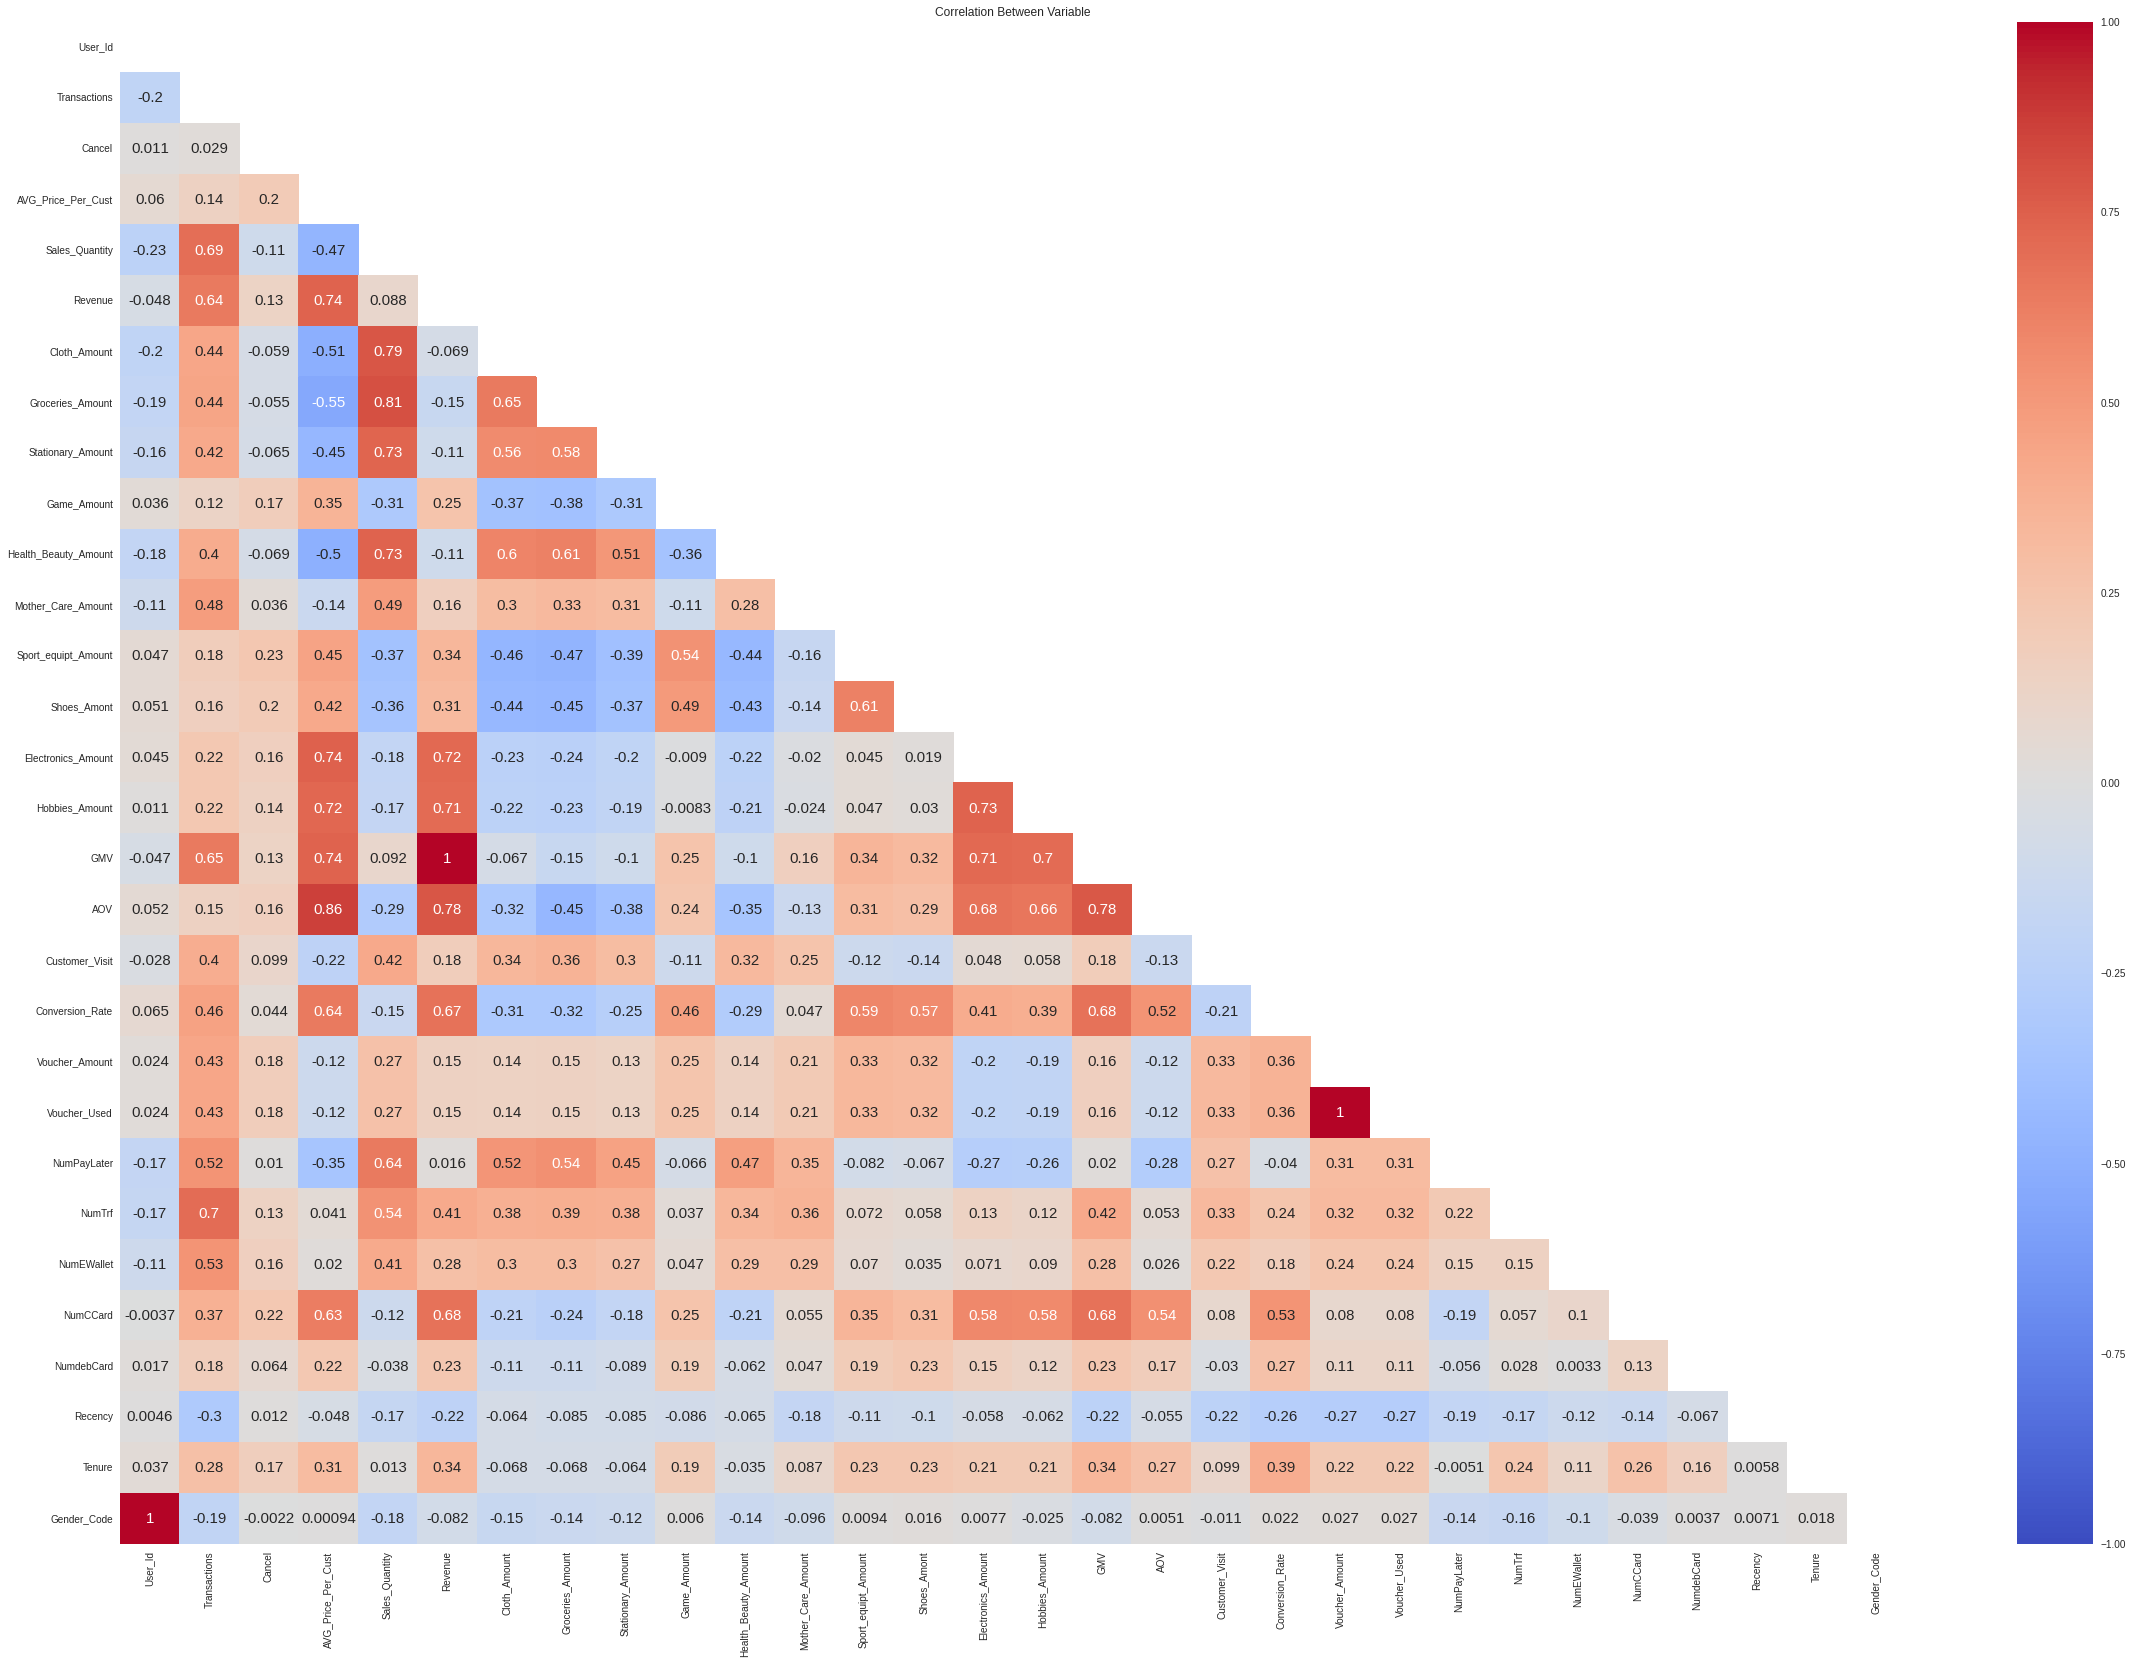

In [ ]:
fig , ax = plt.subplots(figsize=(40,28))

ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))

sns.heatmap(df_corr.corr()
            ,vmin = -1
            ,vmax = 1
            ,cmap ='coolwarm'
            ,annot = True
            ,mask = mask,
            annot_kws = {"fontsize":15})

plt.show()

Plot Terhadap Sejumlah Variabel Terpilih : Subset Data


<Figure size 576x396 with 0 Axes>

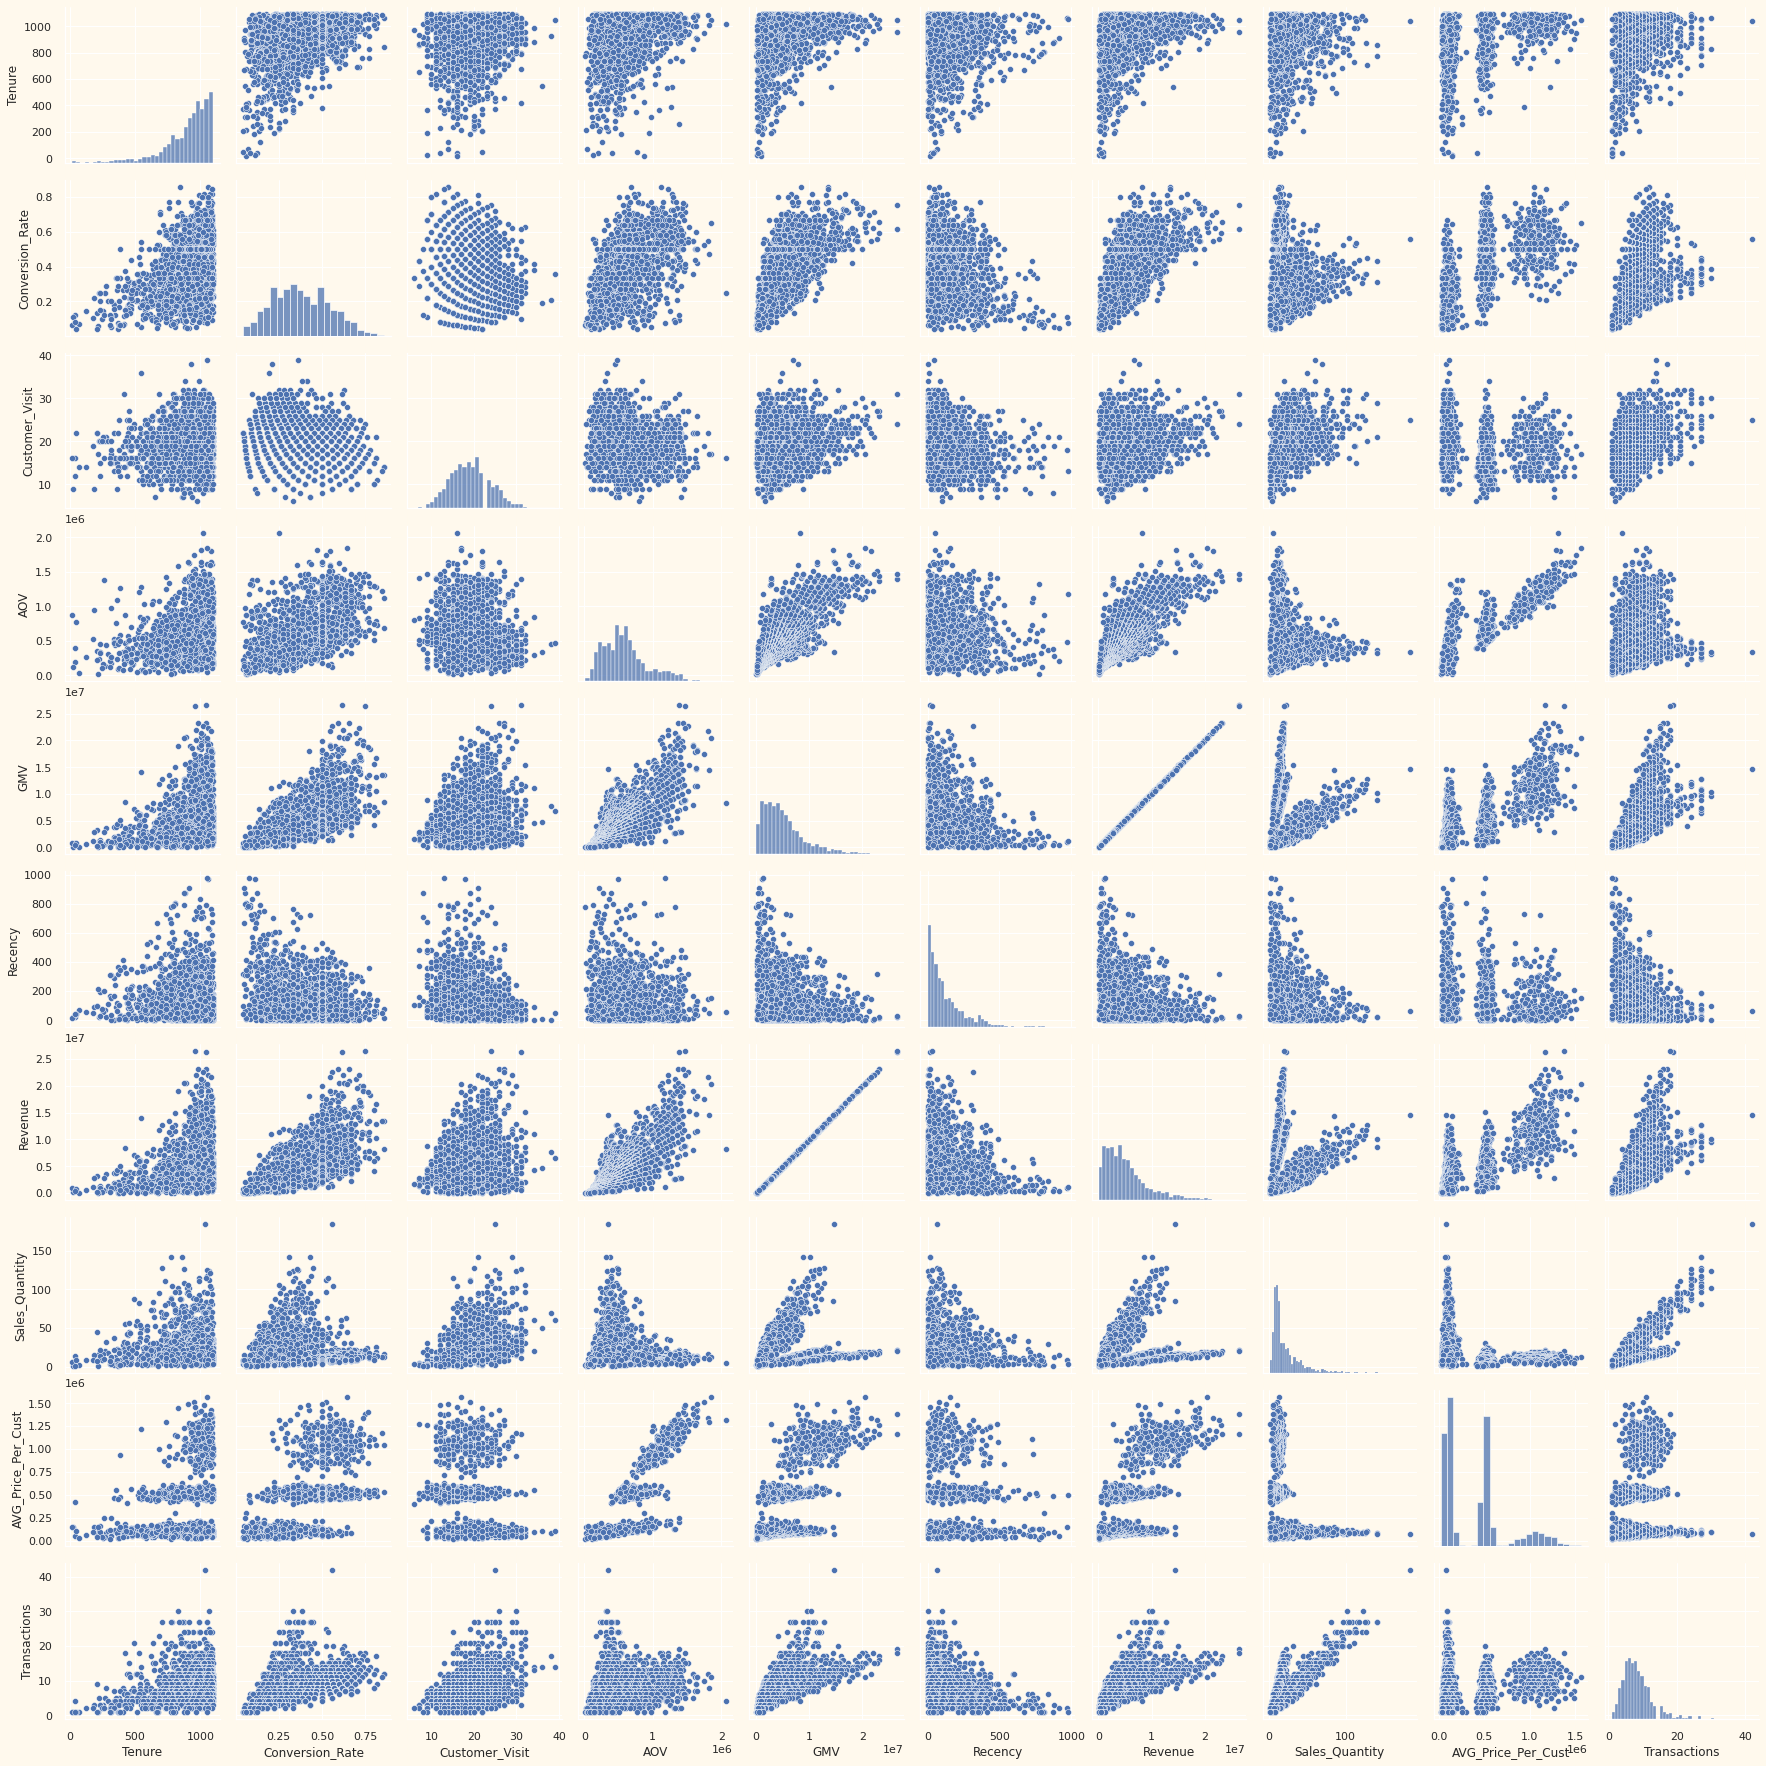

In [ ]:
# Melakukan plotting analisis terhadap sejumlah variabel terpilih
# Mengidentifikasi distribusi variabel tunggal dan hubungan antara dua variabel
# Histogram (sumbu diagonal); distribusi variabel tunggal, scatterplot; hubungan antara dua variabel

# Menentukan preferensi warna

from matplotlib import colors
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9" "#9F8A78", "#F3AB60","#ff9966","#00e6b8","#ccccff", "#b3b3b3"]
Cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60","#ff9966","#00e6b8",'#ccccff', "#b3b3b3"])

# Melakukan plotting terhadap sejumlah variabel dalam fungsi To-Plot
To_Plot = ["Tenure", "Conversion_Rate", "Customer_Visit", "AOV", "GMV", "Recency", "Revenue", "Sales_Quantity", "AVG_Price_Per_Cust", "Transactions"]
print("Plot Terhadap Sejumlah Variabel Terpilih : Subset Data")
plt.figure()
sns.pairplot(df_corr[To_Plot], markers=["o", "s"], palette= "husl")

#Taking hue
plt.show()

## **Clustering For Dataset Segmentation**

In [ ]:
df_clust = df_ecom.copy()
df_clust.head(8)

User_Id                     User_Name Register_Date Gender     Province  \
0    10084              Tasdik Sihombing    2019-02-27   male  DKI Jakarta   
1    10005  Pranata Lega Firgantoro S.Pt    2019-09-21   male  DKI Jakarta   
2    10007             Bancar Firgantoro    2019-01-29   male  Jawa Tengah   
3    10006            Slamet Nashiruddin    2019-08-10   male       Banten   
4    10013               Banara Sitompul    2019-08-21   male  Jawa Tengah   
5    10018             Harsanto Simbolon    2020-01-22   male  DKI Jakarta   
6    10039         Vero Megantara M.Farm    2019-04-18   male  DKI Jakarta   
7    10046           Eman Nyoman Damanik    2019-07-03   male  DKI Jakarta   

              City First_Activity Last_Activity   Max_Date  Transactions  \
0    South Jakarta     2019-02-27    2021-10-28 2021-12-30            42   
1  Jakarta Selatan     2019-09-22    2021-09-21 2021-12-30            30   
2         Semarang     2019-02-01    2021-12-28 2021-12-30            30   
3   Kota Tangerang     2019-10-10    2021-10-28 2021-12-30            27   
4         Semarang     2019-08-21    2021-12-11 2021-12-30            27   
5  Jakarta Selatan     2020-01-26    2021-10-24 2021-12-30            27   
6  Central Jakarta     2019-04-18    2021-09-18 2021-12-30            27   
7    South Jakarta     2019-10-17    2021-10-17 2021-12-30            27   

   Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0       1               76444             184  14475000            10   
1       1               90909             102   9445000             4   
2       0               94667             123  10135000            10   
3       3              112083             108  12635000            16   
4       0               86667             141  10040000             3   
5       0              104815             128  12685000             9   
6       0               90000             115  10650000             6   
7       1               82167             102   6260000             3   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   
5                 6                  5            0                     2   
6                12                  0            0                     2   
7                10                  3            0                    11   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   
5                   5                    0            0                   0   
6                   7                    0            0                   0   
7                   3                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit  Conversion_Rate  \
0               0  14625000  344643              25            0.560   
1               0   9620000  314833              26            0.385   
2               0  10310000  337833              30            0.333   
3               0  12710000  467963              24            0.375   
4               0  10190000  371852              21            0.429   
5               0  12760000  469815              20            0.450   
6               0  10775000  394444            

### **Aglomerative Clustering**

In [ ]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1997
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   User_Id               1998 non-null   int64         
 1   User_Name             1998 non-null   object        
 2   Register_Date         1998 non-null   datetime64[ns]
 3   Gender                1998 non-null   category      
 4   Province              1998 non-null   object        
 5   City                  1998 non-null   object        
 6   First_Activity        1998 non-null   datetime64[ns]
 7   Last_Activity         1998 non-null   datetime64[ns]
 8   Max_Date              1998 non-null   datetime64[ns]
 9   Transactions          1998 non-null   Int64         
 10  Cancel                1998 non-null   int64         
 11  AVG_Price_Per_Cust    1998 non-null   Int64         
 12  Sales_Quantity        1998 non-null   Int64         
 13  Revenue           

In [ ]:
df_aglo = df_ecom[['Transactions',	'Cancel',	'AVG_Price_Per_Cust',	'Sales_Quantity',	'Revenue',	'Cloth_Amount',	'Groceries_Amount'
								 ,	'Stationary_Amount',	'Game_Amount',	'Health_Beauty_Amount',	'Mother_Care_Amount',	'Sport_equipt_Amount',	'Shoes_Amont'
								 ,	'Electronics_Amount',	'Hobbies_Amount',	'AOV',	'Customer_Visit',	'Conversion_Rate',	'Voucher_Amount'
								 ,	'Voucher_Used',	'NumPayLater',	'NumTrf',	'NumEWallet',	'NumCCard',	'NumdebCard',	'Recency',	'Tenure','Gender_Code']]
df_aglo.head()

Transactions  Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  \
0            42       1               76444             184  14475000   
1            30       1               90909             102   9445000   
2            30       0               94667             123  10135000   
3            27       3              112083             108  12635000   
4            27       0               86667             141  10040000   

   Cloth_Amount  Groceries_Amount  Stationary_Amount  Game_Amount  \
0            10                10                  9            0   
1             4                 7                  6            0   
2            10                 6                  5            0   
3            16                11                  0            0   
4             3                11                  7            0   

   Health_Beauty_Amount  Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  \
0                    10                   6                    0            0   
1                    10                   6                    0            0   
2                     4                   5                    0            0   
3                     7                   2                    0            0   
4                     4                   2                    0            0   

   Electronics_Amount  Hobbies_Amount     AOV  Customer_Visit  \
0                   0               0  344643              25   
1                   0               0  314833              26   
2                   0               0  337833              30   
3                   0               0  467963              24   
4                   0               0  371852              21   

   Conversion_Rate  Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  \
0            0.560          175000             7            3      12   
1            0.385          200000             8            9      18   
2            0.333          175000             7           15      12   
3            0.375          125000             5            9       6   
4            0.429          150000             6            9      15   

   NumEWallet  NumCCard  NumdebCard  Recency  Tenure  Gender_Code  
0          21         6           3       63    1037            0  
1           6         0           0      100     831            0  
2           3         0           0        2    1066            0  
3          21         0           0       63     873            0  
4           3         0           0       19     862            0

In [ ]:
row,column = df_aglo.shape

print("Number of rows in the dataset      :", row)
print("Number of columns in the dataset   :", column)

Number of rows in the dataset      : 1998
Number of columns in the dataset   : 28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



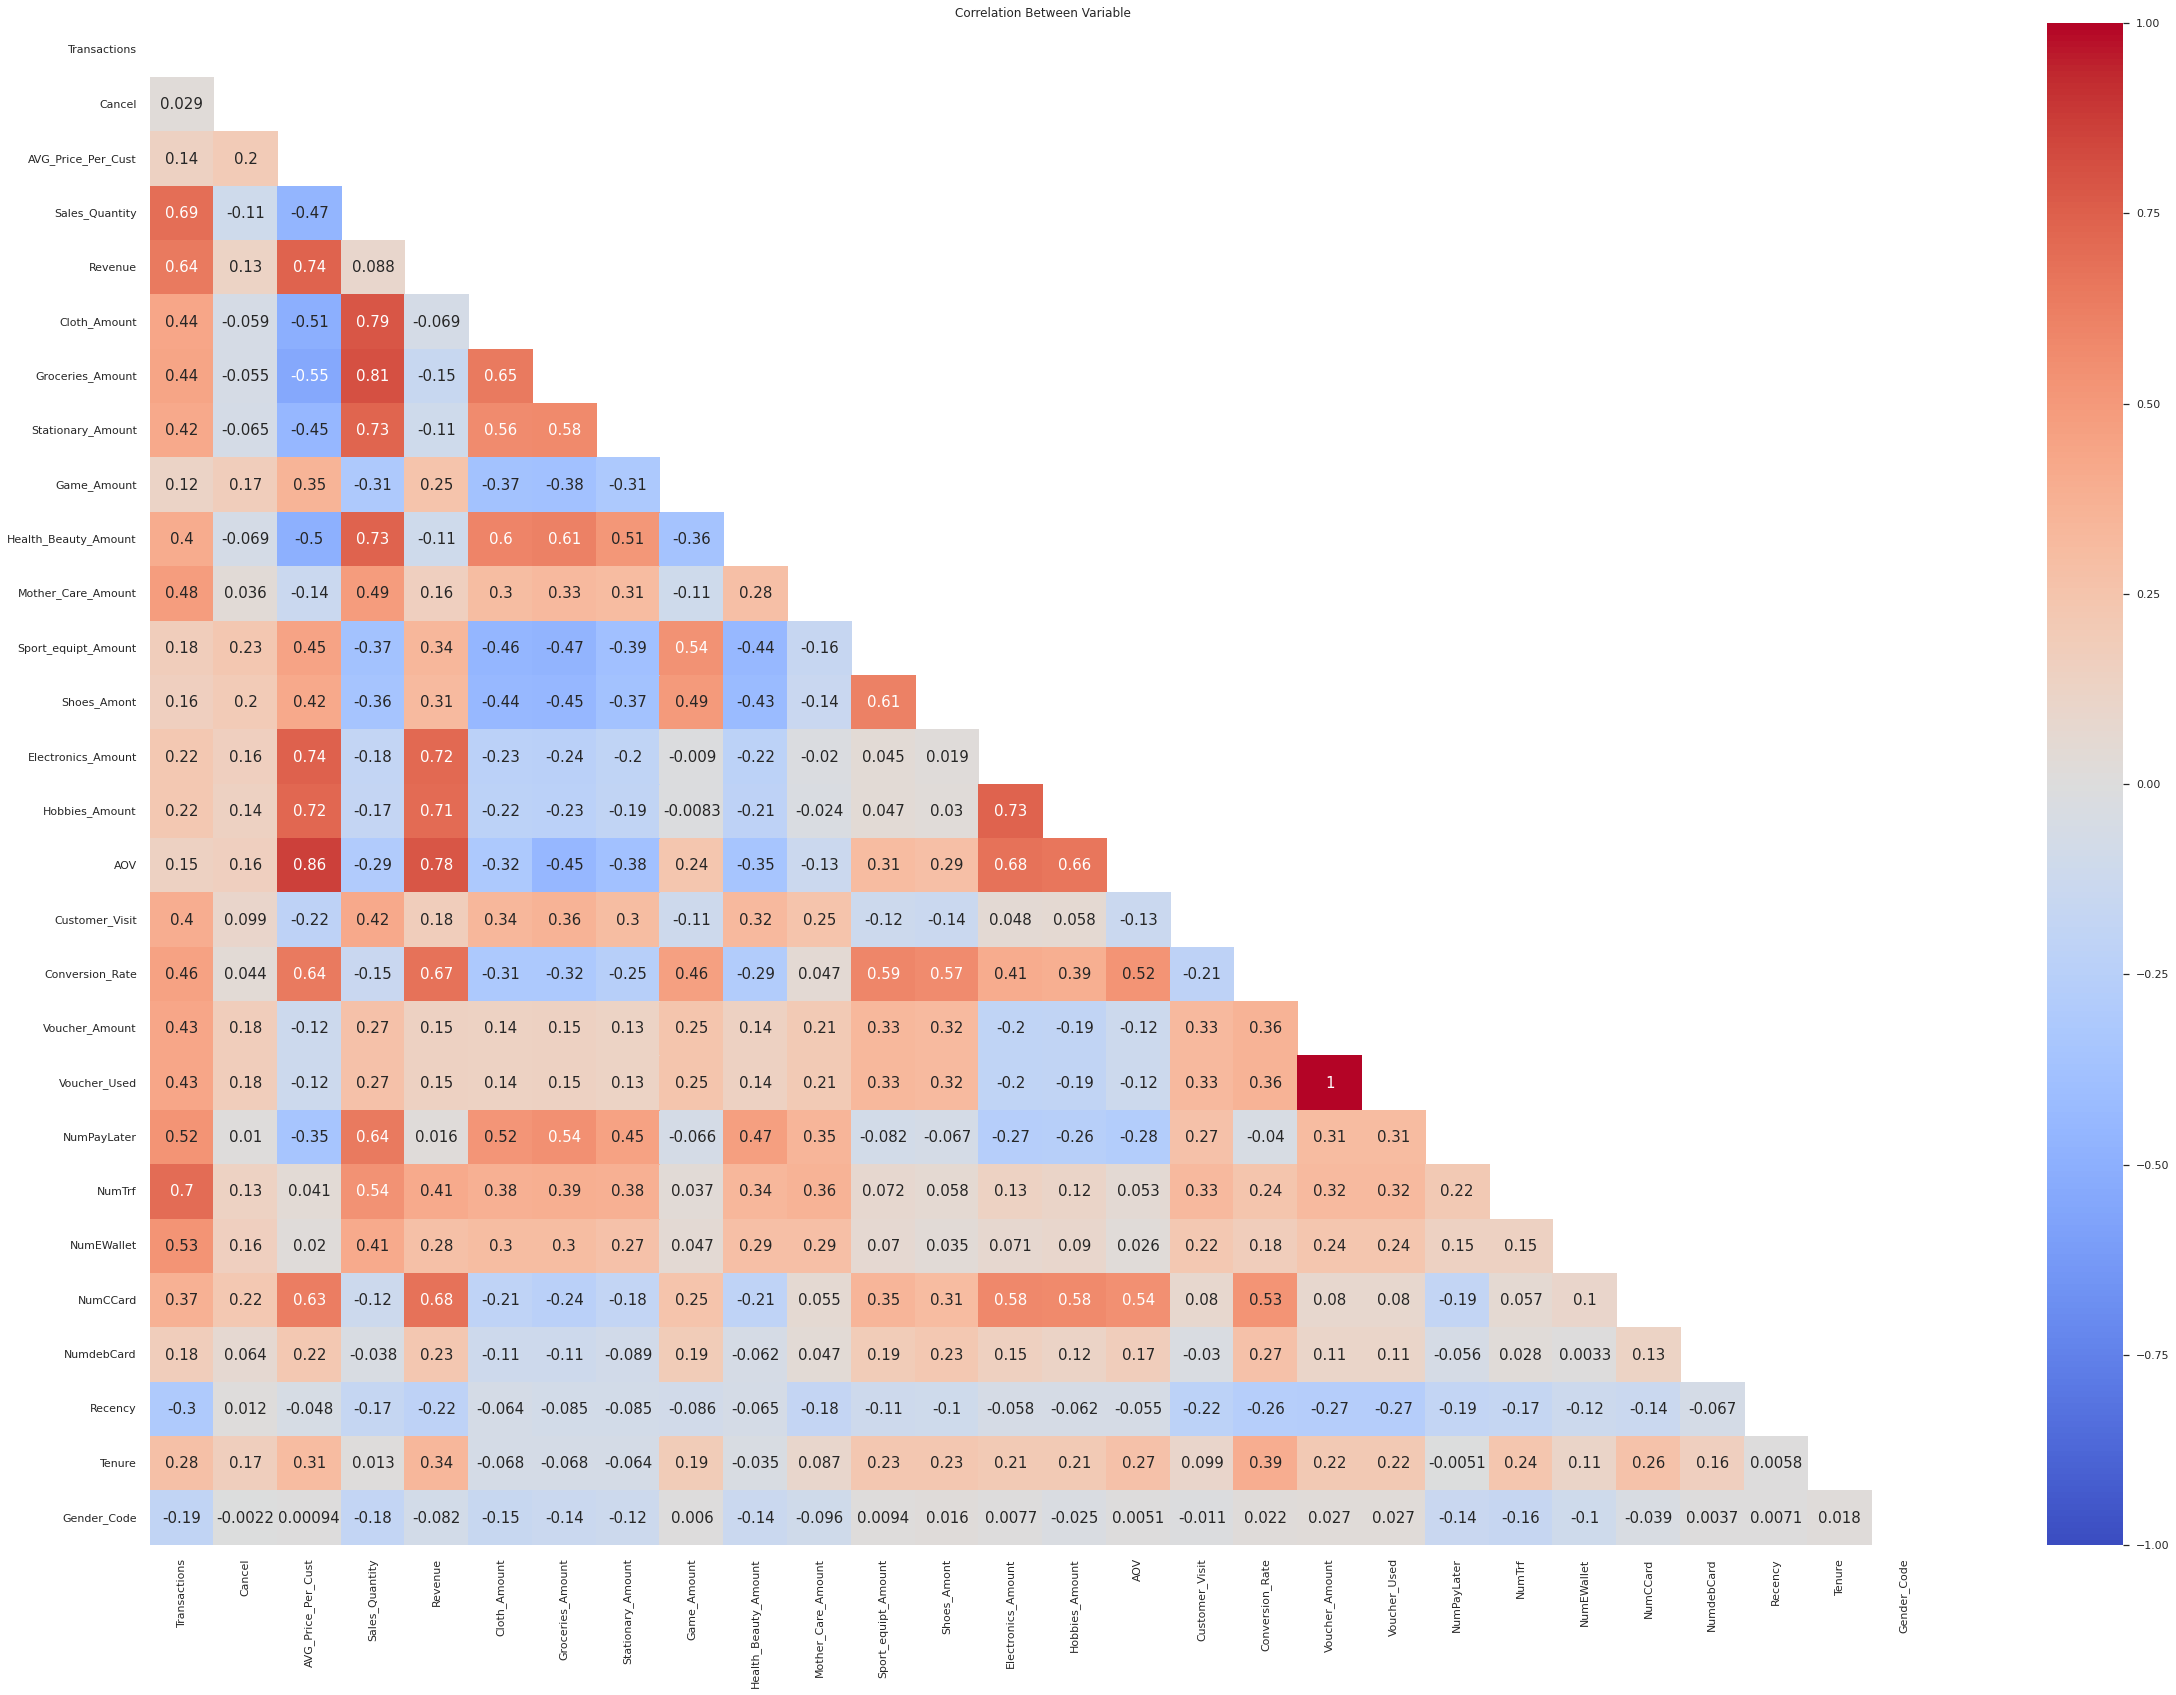

In [ ]:
fig , ax = plt.subplots(figsize=(40,28))

ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(df_aglo.corr(), dtype=np.bool))

sns.heatmap(df_aglo.corr()
            ,vmin = -1
            ,vmax = 1
            ,cmap ='coolwarm'
            ,annot = True
            ,mask = mask,
            annot_kws = {"fontsize":15})

plt.show()

#### **Data Scalling - Aglomerative Clustering**

In [ ]:
scaler = StandardScaler()
scaler.fit(df_aglo)

df_aglo_scaled = pd.DataFrame(scaler.transform(df_aglo), columns = df_aglo.columns)
print("All features are now scaled")

All features are now scaled


In [ ]:
df_aglo_scaled.head(6)

Transactions    Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  \
0      7.652306  0.407080           -0.893415        7.996451  2.263562   
1      4.923331  0.407080           -0.852390        3.948027  1.036319   
2      4.923331 -0.789017           -0.841732        4.984819  1.204668   
3      4.241088  2.799275           -0.792337        4.244253  1.814630   
4      4.241088 -0.789017           -0.864421        5.873497  1.181490   
5      4.241088 -0.789017           -0.812950        5.231674  1.826830   

   Cloth_Amount  Groceries_Amount  Stationary_Amount  Game_Amount  \
0      4.887285          4.681278           7.617353    -0.597983   
1      1.580174          3.085079           4.902660    -0.597983   
2      4.887285          2.553013           3.997763    -0.597983   
3      8.194396          5.213344          -0.526725    -0.597983   
4      1.028989          5.213344           5.807558    -0.597983   
5      4.336100          2.553013           3.997763    -0.597983   

   Health_Beauty_Amount  Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  \
0              6.385492            4.529427            -0.733424    -0.708218   
1              6.385492            4.529427            -0.733424    -0.708218   
2              2.192849            3.626974            -0.733424    -0.708218   
3              4.289170            0.919616            -0.733424    -0.708218   
4              2.192849            0.919616            -0.733424    -0.708218   
5              0.795301            3.626974            -0.733424    -0.708218   

   Electronics_Amount  Hobbies_Amount       AOV  Customer_Visit  \
0           -0.372363       -0.356707 -0.770057        1.224422   
1           -0.372363       -0.356707 -0.860984        1.435281   
2           -0.372363       -0.356707 -0.790829        2.278720   
3           -0.372363       -0.356707 -0.393907        1.013562   
4           -0.372363       -0.356707 -0.687065        0.380983   
5           -0.372363       -0.356707 -0.388258        0.170123   

   Conversion_Rate  Voucher_Amount  Voucher_Used  NumPayLater    NumTrf  \
0         1.113026        1.234160      1.234160     0.507608  3.313275   
1         0.033655        1.681358      1.681358     3.444481  5.671917   
2        -0.287073        1.234160      1.234160     6.381355  3.313275   
3        -0.028024        0.339763      0.339763     3.444481  0.954632   
4         0.305039        0.786962      0.786962     3.444481  4.492596   
5         0.434564       -0.554633     -0.554633     1.976045  5.671917   

   NumEWallet  NumCCard  NumdebCard   Recency    Tenure  Gender_Code  
0   10.974421  2.450841    4.469365 -0.492817  0.767026    -0.734364  
1    2.421479 -0.870887   -0.441611 -0.232698 -0.422992    -0.734364  
2    0.710890 -0.870887   -0.441611 -0.921661  0.934553    -0.734364  
3   10.974421 -0.870887   -0.441611 -0.492817 -0.180367    -0.734364  
4    0.710890 -0.870887   -0.441611 -0.802147 -0.243912    -0.734364  
5    0.710890 -0.870887   -0.441611 -0.464696 -1.133537    -0.734364

#### **Dimensionality Reduction - Aglomerative Clustering**

In [ ]:
pca = PCA(n_components = 3)
pca.fit(df_aglo_scaled)

df_cluster_pca = pd.DataFrame(pca.fit_transform(df_aglo_scaled), columns = (['PCA1', 'PCA2','PCA3']))
df_cluster_pca

PCA1       PCA2      PCA3
0     10.113771  14.910711 -3.148137
1      8.847236   9.431373 -1.040393
2      8.807584   8.872751 -0.980436
3      8.477840   9.096235 -2.244465
4      8.044363   7.513974 -1.490426
...         ...        ...       ...
1993  -0.642595  -4.552171  0.285421
1994   0.036554  -5.297561 -0.819618
1995   1.256168  -5.281537 -0.834298
1996   1.217230  -3.705451 -0.330082
1997   0.653345  -4.974908 -1.525373

[1998 rows x 3 columns]

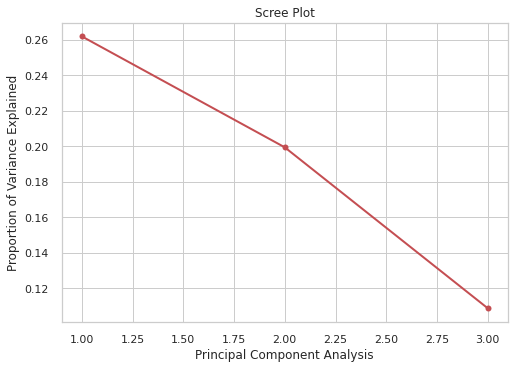

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component Analysis')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)

out_sum = np.cumsum(pca.explained_variance_ratio_)

print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.26181833 0.199352   0.1087583 ]
Cumulative Prop. Variance Explained:  [0.26181833 0.46117033 0.56992863]


In [ ]:
print(pca.explained_variance_)

[7.33458417 5.58465107 3.04675754]


In [ ]:
pca_aglo = df_cluster_pca.iloc[:,:3].values
pca_aglo

array([[10.113868  , 14.91069269, -3.14801952],
       [ 8.84734765,  9.43111873, -1.04022614],
       [ 8.80762796,  8.8723894 , -0.97850843],
       ...,
       [ 1.25624144, -5.281676  , -0.83374195],
       [ 1.21725387, -3.70554613, -0.33010802],
       [ 0.65340676, -4.9748868 , -1.52495796]])

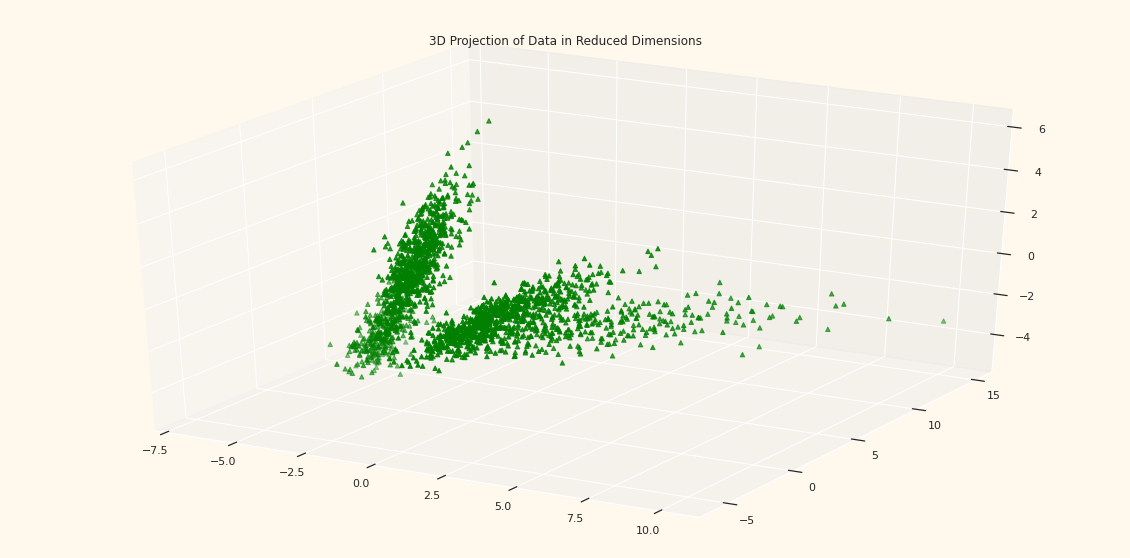

In [ ]:
x = df_cluster_pca['PCA1']
y = df_cluster_pca['PCA2']
z = df_cluster_pca['PCA3']

# Plotting 3D
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="^")
ax.set_title("3D Projection of Data in Reduced Dimensions")
plt.show()

In [ ]:
# Plotting 3D
fig = px.scatter_3d(df_cluster_pca, x, y, z,
                    title="3D Scatter Plot")
fig.show()

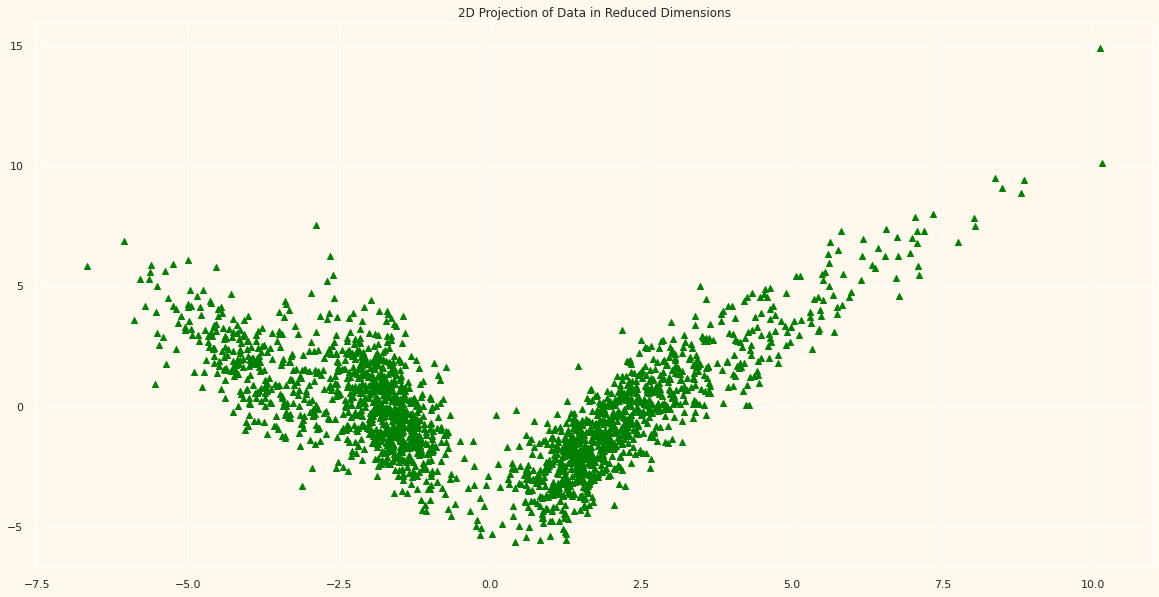

In [ ]:
# Plotting 2D
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="green", marker="^" )
ax.set_title("2D Projection of Data in Reduced Dimensions")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.35632419581276653
For n_clusters = 3 The average silhouette_score is : 0.3477846394912853
For n_clusters = 4 The average silhouette_score is : 0.4229897439467184
For n_clusters = 5 The average silhouette_score is : 0.40079075519283924
For n_clusters = 6 The average silhouette_score is : 0.4164912038945526


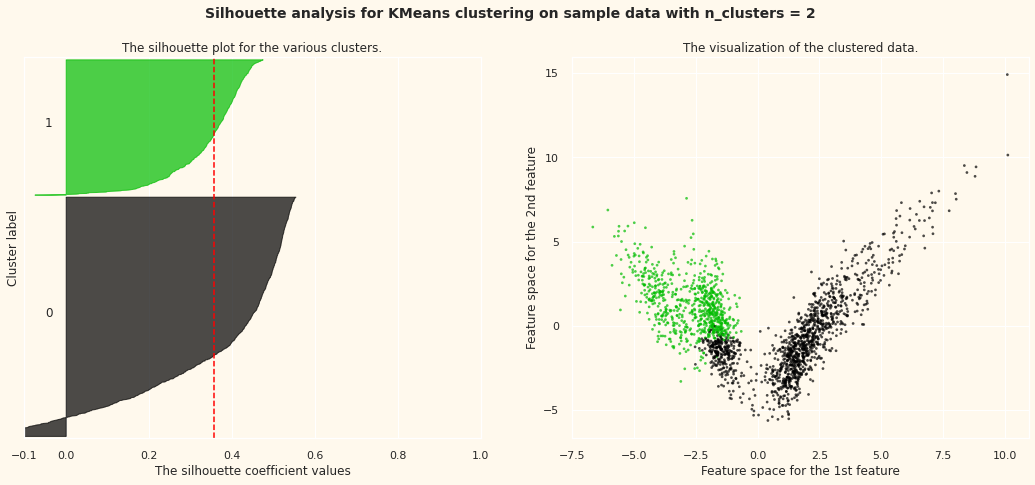

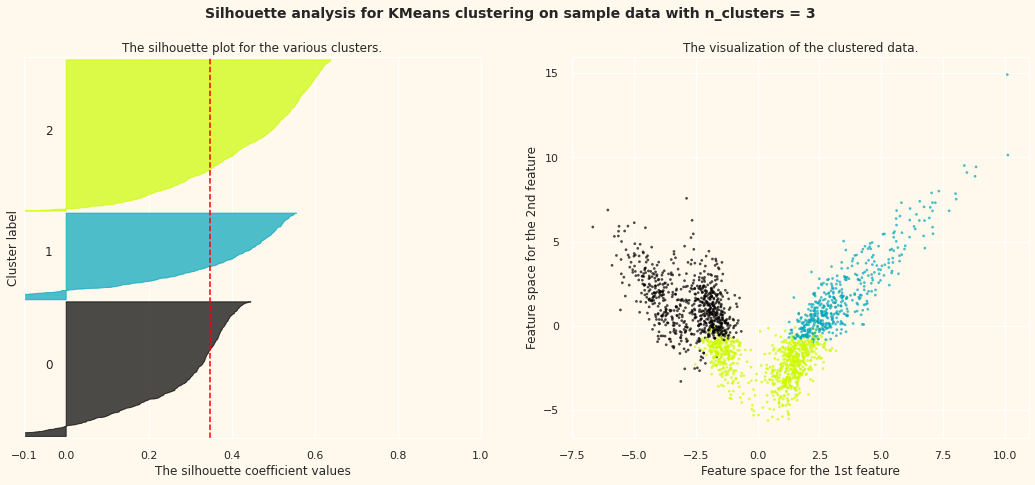

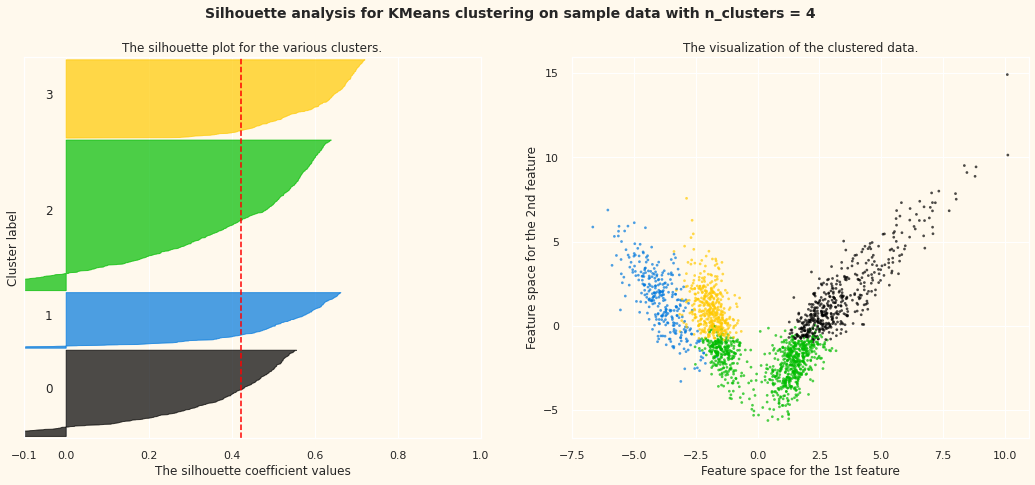

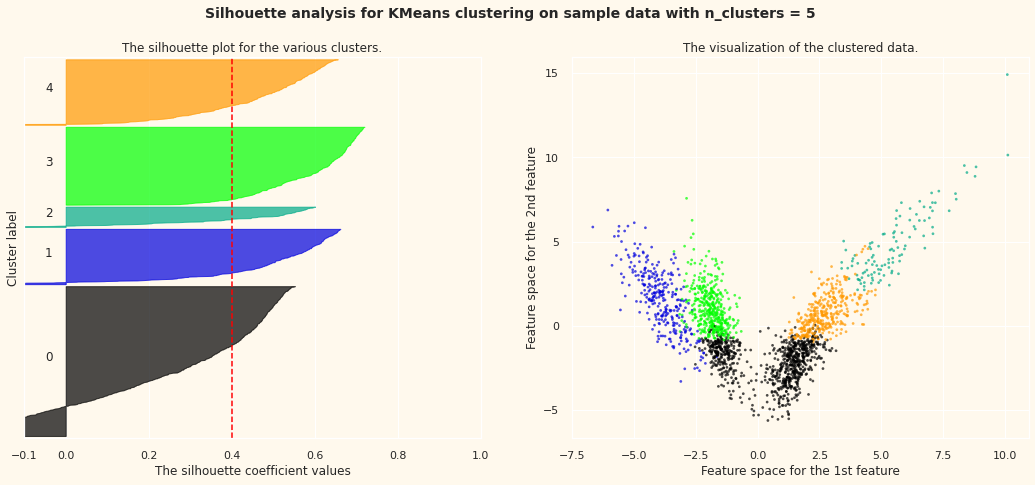

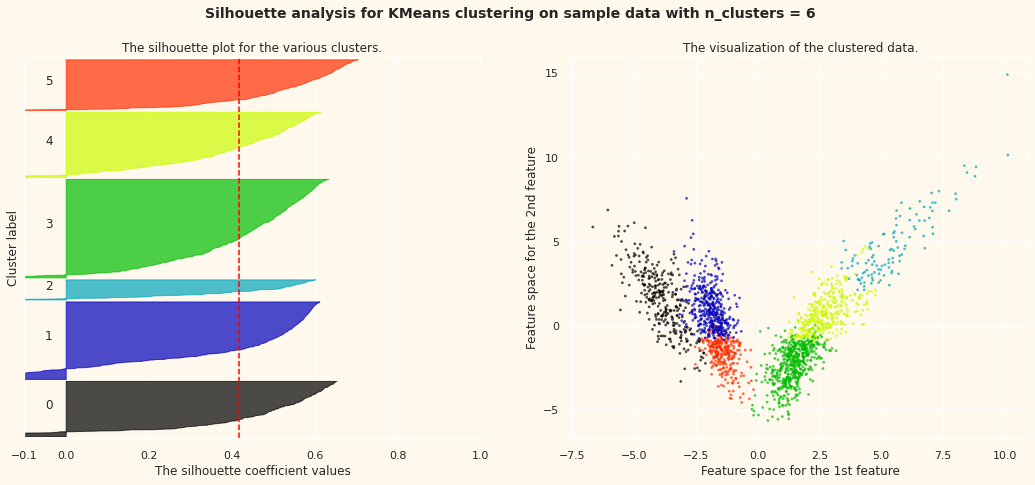

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_aglo) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean',
                                  linkage = 'ward')
    cluster_labels = clusterer.fit_predict(pca_aglo)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_aglo, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_aglo, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        pca_aglo[:, 0], pca_aglo[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### **Clustering**

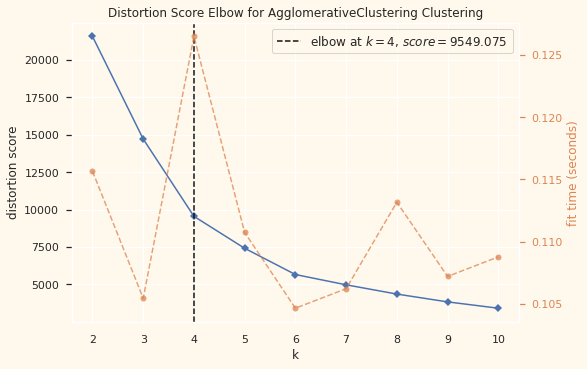

In [ ]:
elbow = KElbowVisualizer(AgglomerativeClustering(), k=10)
elbow.fit(df_cluster_pca)
elbow.show()

In [ ]:
# Initiating the K-Means Clustering model
ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',
                                  linkage = 'ward')

# Fit model and predict clusters
df_ac = ac.fit_predict(df_cluster_pca)
df_cluster_pca["Cluster Label"] = df_ac

# Menambahkan fitur "Clusters" ke dataframe asli
df_aglo["Cluster Label"] = df_ac
df_clust["Cluster Label"] = df_ac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_aglo

Transactions  Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  \
0               42       1               76444             184  14475000   
1               30       1               90909             102   9445000   
2               30       0               94667             123  10135000   
3               27       3              112083             108  12635000   
4               27       0               86667             141  10040000   
...            ...     ...                 ...             ...       ...   
1993             1       2              486667               1    385000   
1994             1       0              425000               1    400000   
1995             1       0               35000               3     80000   
1996             1       2               30000               8    135000   
1997             1       1              150000               2    500000   

      Cloth_Amount  Groceries_Amount  Stationary_Amount  Game_Amount  \
0               10                10                  9            0   
1                4                 7                  6            0   
2               10                 6                  5            0   
3               16                11                  0            0   
4                3                11                  7            0   
...            ...               ...                ...          ...   
1993             0                 0                  0            0   
1994             0                 0                  0            0   
1995             0                 0                  1            0   
1996             0                 1                  2            0   
1997             1                 0                  0            0   

      Health_Beauty_Amount  Mother_Care_Amount  Sport_equipt_Amount  \
0                       10                   6                    0   
1                       10                   6                    0   
2                        4                   5                    0   
3                        7                   2                    0   
4                        4                   2                    0   
...                    ...                 ...                  ...   
1993                     0                   0                    1   
1994                     0                   0                    1   
1995                     0                   0                    0   
1996                     0                   0                    0   
1997                     1                   0                    0   

      Shoes_Amont  Electronics_Amount  Hobbies_Amount     AOV  Customer_Visit  \
0               0                   0               0  344643              25   
1               0                   0               0  314833              26   
2               0                   0               0  337833              30   
3               0                   0               0  467963              24   
4               0                   0               0  371852              21   
...           ...                 ...             ...     ...             ...   
1993            2                   0               0  385000               8   
1994            0                   0               0  400000              12   
1995            0                   0               0   80000              16   
1996            0                   0               0  135000              20   
1997            0                   0               0  500000              16   

      Conversion_Rate  Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  \
0               0.560          175000             7            3      12   
1               0.385          200000             8            9      18   
2               0.333          175000             7           15      12   
3               0.375          125000             5            9       6   
4               0.429 

In [ ]:
df_clust

User_Id                     User_Name Register_Date  Gender  \
0       10084              Tasdik Sihombing    2019-02-27    male   
1       10005  Pranata Lega Firgantoro S.Pt    2019-09-21    male   
2       10007             Bancar Firgantoro    2019-01-29    male   
3       10006            Slamet Nashiruddin    2019-08-10    male   
4       10013               Banara Sitompul    2019-08-21    male   
...       ...                           ...           ...     ...   
1993    20404       Jane Shakila Nurdiyanti    2019-08-08  female   
1994    20430            Oni Lidya Haryanti    2021-11-19  female   
1995    10469                 Kayun Siregar    2020-11-14    male   
1996    20208   Nilam Suci Pudjiastuti S.Pd    2019-07-18  female   
1997    10483            Harimurti Prasasta    2020-12-10    male   

         Province             City First_Activity Last_Activity   Max_Date  \
0     DKI Jakarta    South Jakarta     2019-02-27    2021-10-28 2021-12-30   
1     DKI Jakarta  Jakarta Selatan     2019-09-22    2021-09-21 2021-12-30   
2     Jawa Tengah         Semarang     2019-02-01    2021-12-28 2021-12-30   
3          Banten   Kota Tangerang     2019-10-10    2021-10-28 2021-12-30   
4     Jawa Tengah         Semarang     2019-08-21    2021-12-11 2021-12-30   
...           ...              ...            ...           ...        ...   
1993  DKI Jakarta    Jakarta Timur     2019-08-11    2019-08-11 2021-12-30   
1994  DKI Jakarta    Jakarta Utara     2021-11-19    2021-11-19 2021-12-30   
1995  DKI Jakarta  Central Jakarta     2020-11-14    2020-11-14 2021-12-30   
1996       Banten   Kota Tangerang     2021-04-27    2021-04-27 2021-12-30   
1997  DKI Jakarta    Jakarta Barat     2021-01-16    2021-01-16 2021-12-30   

      Transactions  Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  \
0               42       1               76444             184  14475000   
1               30       1               90909             102   9445000   
2               30       0               94667             123  10135000   
3               27       3              112083             108  12635000   
4               27       0               86667             141  10040000   
...            ...     ...                 ...             ...       ...   
1993             1       2              486667               1    385000   
1994             1       0              425000               1    400000   
1995             1       0               35000               3     80000   
1996             1       2               30000               8    135000   
1997             1       1              150000               2    500000   

      Cloth_Amount  Groceries_Amount  Stationary_Amount  Game_Amount  \
0               10                10                  9            0   
1                4                 7                  6            0   
2               10                 6                  5            0   
3               16                11                  0            0   
4                3                11                  7            0   
...            ...               ...                ...          ...   
1993             0                 0                  0            0   
1994             0                 0                  0            0   
1995             0                 0                  1            0   
1996             0                 1                  2            0   
1997             1                 0                  0            0   

      Health_Beauty_Amount  Mother_Care_Amount  Sport_equipt_Amount  \
0                       10                   6                    0   
1                       10                   6                    0   
2                        4                   5                    0   
3                        7                   2                    0   
4                        4                   2                    0   
...                    ...          

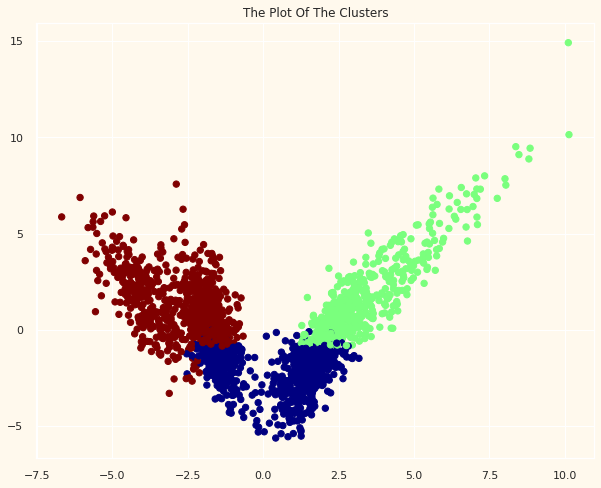

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=df_aglo["Cluster Label"], marker='o', cmap='jet_r')
ax.set_title("The Plot Of The Clusters")
plt.show()

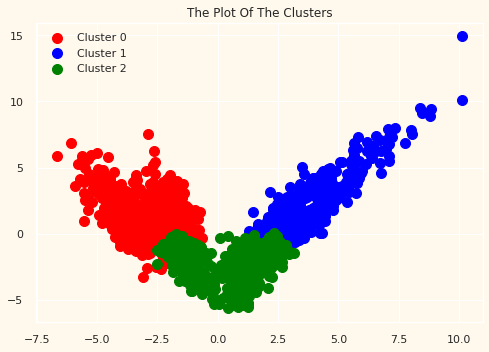

In [ ]:
plt.scatter(pca_aglo[df_ac == 0, 0], pca_aglo[df_ac == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(pca_aglo[df_ac == 1, 0], pca_aglo[df_ac == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(pca_aglo[df_ac == 2, 0], pca_aglo[df_ac == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
# plt.scatter(X[df_ac == 3, 0], X[df_ac == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('The Plot Of The Clusters')
plt.legend()
plt.show()

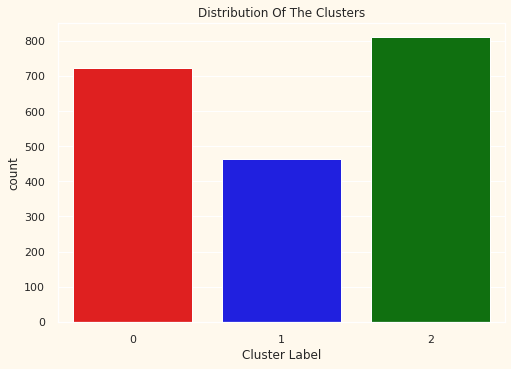

In [ ]:
palette = ["red","blue", "green"]
pl = sns.countplot(x=df_aglo["Cluster Label"], palette= palette)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
ac_clust_sizes = df_aglo.groupby('Cluster Label').size().to_frame()
ac_clust_sizes.columns = ["Aglomerative Clustering Weight"]
ac_clust_sizes

Aglomerative Clustering Weight
Cluster Label                                
0                                         722
1                                         465
2                                         811

#### **Multivariate Viz**

In [ ]:
df_mul = df_clust.copy()

In [ ]:
df_mul.head()

User_Id                     User_Name Register_Date Gender     Province  \
0    10084              Tasdik Sihombing    2019-02-27   male  DKI Jakarta   
1    10005  Pranata Lega Firgantoro S.Pt    2019-09-21   male  DKI Jakarta   
2    10007             Bancar Firgantoro    2019-01-29   male  Jawa Tengah   
3    10006            Slamet Nashiruddin    2019-08-10   male       Banten   
4    10013               Banara Sitompul    2019-08-21   male  Jawa Tengah   

              City First_Activity Last_Activity   Max_Date  Transactions  \
0    South Jakarta     2019-02-27    2021-10-28 2021-12-30            42   
1  Jakarta Selatan     2019-09-22    2021-09-21 2021-12-30            30   
2         Semarang     2019-02-01    2021-12-28 2021-12-30            30   
3   Kota Tangerang     2019-10-10    2021-10-28 2021-12-30            27   
4         Semarang     2019-08-21    2021-12-11 2021-12-30            27   

   Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0       1               76444             184  14475000            10   
1       1               90909             102   9445000             4   
2       0               94667             123  10135000            10   
3       3              112083             108  12635000            16   
4       0               86667             141  10040000             3   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit  Conversion_Rate  \
0               0  14625000  344643              25            0.560   
1               0   9620000  314833              26            0.385   
2               0  10310000  337833              30            0.333   
3               0  12710000  467963              24            0.375   
4               0  10190000  371852              21            0.429   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   
1          200000             8            9      18           6         0   
2          175000             7           15      12           3         0   
3          125000             5            9       6          21         0   
4          150000             6            9      15           3         0   

   NumdebCard  Recency  Tenure  Gender_Code  Cluster Label  
0           3       63    1037            0              1  
1           0      100     831            0              1  
2           0        2    1066            0              1  
3           0       63     873            0              1  
4           0       19     862            0              1

##### **Paylater**

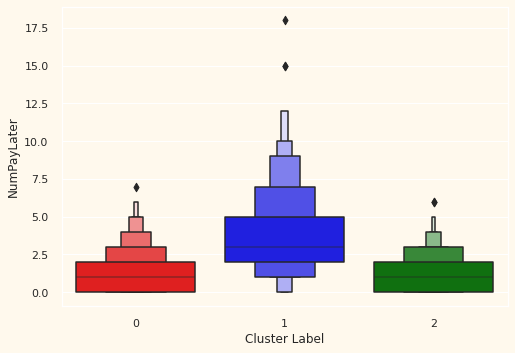

In [ ]:
plt.figure()
plot = sns.boxenplot(y = df_mul["NumPayLater"], x = df_mul["Cluster Label"], palette= palette)
pl.set_title("Count of Paylater")
plt.show()

##### **Transfer**

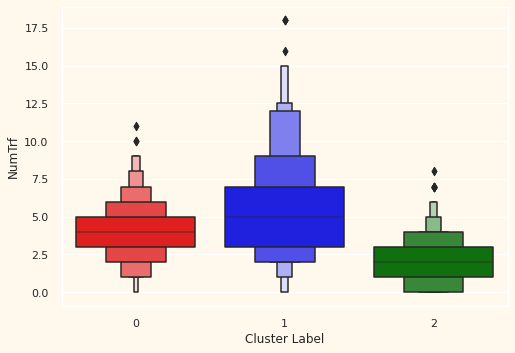

In [ ]:
plt.figure()
plot = sns.boxenplot(y = df_mul["NumTrf"], x = df_mul["Cluster Label"], palette= palette)
pl.set_title("Count of Transfer Method")
plt.show()

##### **E-Wallet**

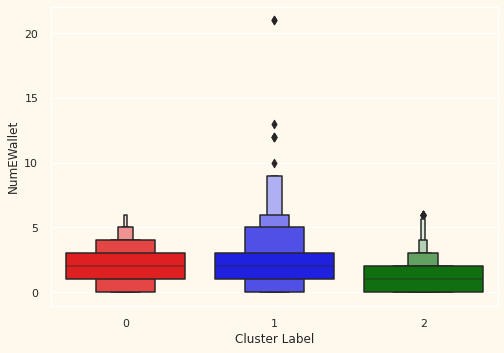

In [ ]:
plt.figure()
plot = sns.boxenplot(y = df_mul["NumEWallet"], x = df_mul["Cluster Label"], palette= palette)
pl.set_title("Count of E-Wallet Method")
plt.show()

##### **C-Card**

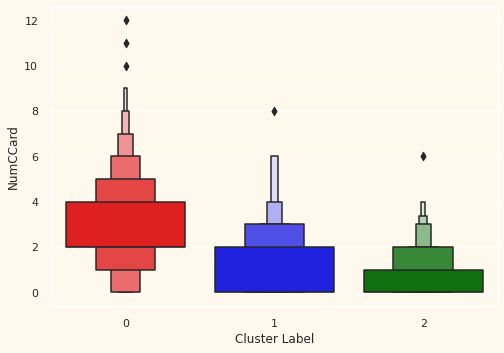

In [ ]:
plt.figure()
plot = sns.boxenplot(y = df_mul["NumCCard"], x = df_mul["Cluster Label"], palette= palette)
pl.set_title("Count of E-Wallet Method")
plt.show()

##### **Debit Card**

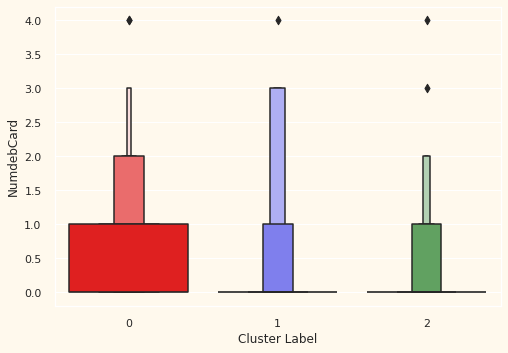

In [ ]:
plt.figure()
plot = sns.boxenplot(y = df_mul["NumdebCard"], x = df_mul["Cluster Label"], palette= palette)
pl.set_title("Count of E-Wallet Method")
plt.show()

##### **Transactions VS GMV**

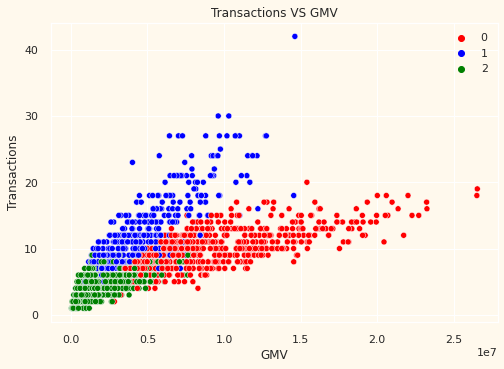

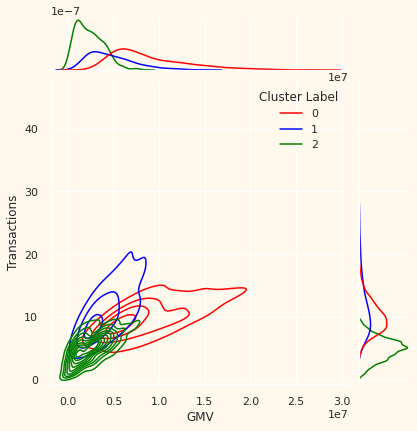

In [ ]:
pl = sns.scatterplot(data = df_mul,x = df_mul["GMV"], y = df_mul["Transactions"],hue = df_mul["Cluster Label"], palette = palette)
pl.set_title("Transactions VS GMV")
plt.legend()
plt.show()

sns.jointplot(x =  df_mul["GMV"], y = df_mul["Transactions"],hue = df_mul["Cluster Label"], kind = "kde", palette = palette)

##### **Recency VS GMV**

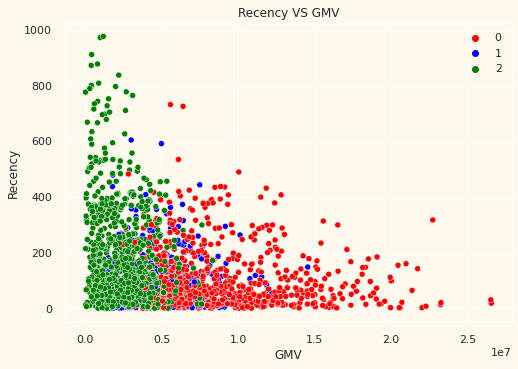

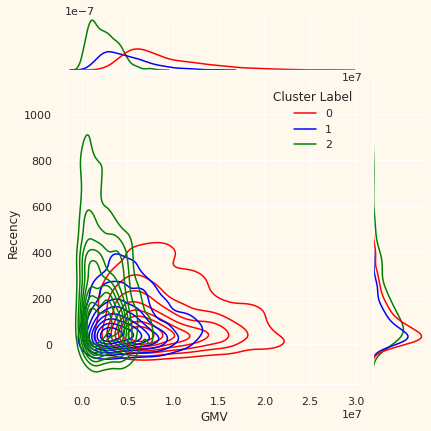

In [ ]:
pl = sns.scatterplot(data = df_mul,x = df_mul["GMV"], y = df_mul["Recency"],hue = df_mul["Cluster Label"], palette = palette)
pl.set_title("Recency VS GMV")
plt.legend()
plt.show()

sns.jointplot(x =  df_mul["GMV"], y = df_mul["Recency"],hue = df_mul["Cluster Label"], kind = "kde", palette = palette)

##### **Average Price VS GMV**

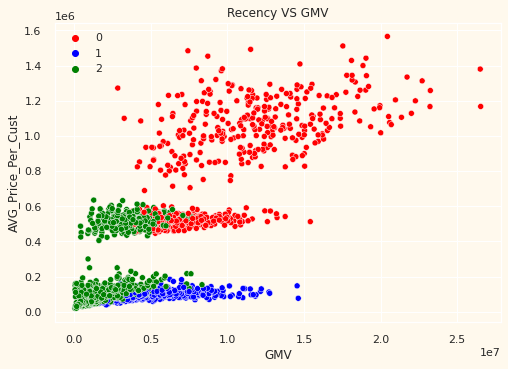

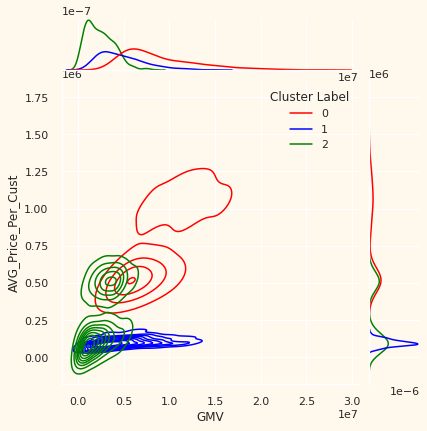

In [ ]:
pl = sns.scatterplot(data = df_mul,x = df_mul["GMV"], y = df_mul["AVG_Price_Per_Cust"],hue = df_mul["Cluster Label"], palette = palette)
pl.set_title("Recency VS GMV")
plt.legend()
plt.show()

sns.jointplot(x =  df_mul["GMV"], y = df_mul["AVG_Price_Per_Cust"],hue = df_mul["Cluster Label"], kind = "kde", palette = palette)

#### **Identify Attribute Characteristics Per Cluster**

In [ ]:
df_clust.head()

User_Id                     User_Name Register_Date Gender     Province  \
0    10084              Tasdik Sihombing    2019-02-27   male  DKI Jakarta   
1    10005  Pranata Lega Firgantoro S.Pt    2019-09-21   male  DKI Jakarta   
2    10007             Bancar Firgantoro    2019-01-29   male  Jawa Tengah   
3    10006            Slamet Nashiruddin    2019-08-10   male       Banten   
4    10013               Banara Sitompul    2019-08-21   male  Jawa Tengah   

              City First_Activity Last_Activity   Max_Date  Transactions  \
0    South Jakarta     2019-02-27    2021-10-28 2021-12-30            42   
1  Jakarta Selatan     2019-09-22    2021-09-21 2021-12-30            30   
2         Semarang     2019-02-01    2021-12-28 2021-12-30            30   
3   Kota Tangerang     2019-10-10    2021-10-28 2021-12-30            27   
4         Semarang     2019-08-21    2021-12-11 2021-12-30            27   

   Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0       1               76444             184  14475000            10   
1       1               90909             102   9445000             4   
2       0               94667             123  10135000            10   
3       3              112083             108  12635000            16   
4       0               86667             141  10040000             3   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit  Conversion_Rate  \
0               0  14625000  344643              25            0.560   
1               0   9620000  314833              26            0.385   
2               0  10310000  337833              30            0.333   
3               0  12710000  467963              24            0.375   
4               0  10190000  371852              21            0.429   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   
1          200000             8            9      18           6         0   
2          175000             7           15      12           3         0   
3          125000             5            9       6          21         0   
4          150000             6            9      15           3         0   

   NumdebCard  Recency  Tenure  Gender_Code  Cluster Label  
0           3       63    1037            0              1  
1           0      100     831            0              1  
2           0        2    1066            0              1  
3           0       63     873            0              1  
4           0       19     862            0              1

In [ ]:
df_ident2 = df_clust[['User_Id',	'User_Name',	'Gender',	'Province','Transactions',	'AVG_Price_Per_Cust',	'Sales_Quantity',	'Revenue',	'Cloth_Amount',	'Groceries_Amount'
                      ,'Stationary_Amount',	'Game_Amount',	'Health_Beauty_Amount',	'Mother_Care_Amount',	'Sport_equipt_Amount',	'Shoes_Amont'
                      ,'Electronics_Amount',	'Hobbies_Amount',	'GMV',	'AOV',	'Customer_Visit',	'Conversion_Rate',	'Voucher_Amount'
                      ,'Voucher_Used',	'NumPayLater',	'NumTrf',	'NumEWallet',	'NumCCard',	'NumdebCard',	'Recency',	'Tenure',	'Gender_Code',	'Cluster Label']]

In [ ]:
df_ident2.groupby('Cluster Label').agg(['count','mean','median', 'max', 'min'])

User_Id                                      Transactions  \
                count          mean   median    max    min        count   
Cluster Label                                                             
0                 722  14487.121884  11202.5  20700  10650          722   
1                 465  12539.266667  10313.0  20349  10000          465   
2                 811  14523.249075  10921.0  20591  10016          811   

                                        AVG_Price_Per_Cust                 \
                    mean median max min              count           mean   
Cluster Label                                                               
0               9.940443   10.0  20   2                722  750920.565097   
1              11.976344   11.0  42   5                465   96351.129032   
2               4.856967    5.0   9   1                811  240629.612824   

                                         Sales_Quantity                    \
                 median      max     min          count       mean median   
Cluster Label                                                               
0              550555.5  1565727  445909            722  12.090028   12.0   
1               93750.0   184091   38750            465   50.03871   43.0   
2              125000.0   635000   20000            811  14.828607   12.0   

                       Revenue                                                \
               max min   count            mean     median       max      min   
Cluster Label                                                                  
0               31   2     722  8763585.872576  7532700.0  26431000  2375000   
1              184  17     465   4651763.44086  4160000.0  14475000   805000   
2               52   1     811  2335733.662145  2110000.0   8265000    15000   

              Cloth_Amount                          Groceries_Amount  \
                     count      mean median max min            count   
Cluster Label                                                          
0                      722  0.000000    0.0   0   0              722   
1                      465  3.363441    3.0  16   0              465   
2                      811  0.863132    0.0   5   0              811   

                                       Stationary_Amount                       \
                   mean median max min             count      mean median max   
Cluster Label                                                                   
0              0.000000    0.0   0   0               722  0.000000    0.0   0   
1              3.539785    3.0  13   0               465  1.765591    1.0  12   
2              0.930949    1.0   7   0               811  0.421702    0.0   3   

                  Game_Amount                          Health_Beauty_Amount  \
              min       count      mean median max min                count   
Cluster Label                                                                 
0               0         722  1.337950    1.0   7   0                  722   
1               0         465  0.000000    0.0   0   0                  465   
2               0         811  0.336621    0.0   4   0                  811   

                                       Mother_Care_Amount                   \
                   mean median max min              count      mean median   
Cluster Label                                                                
0              0.000000    0.0   0   0                722  0.885042    1.0   
1              2.550538    2.0  11   0                465  1.776344    2.0   
2              0.660912    0.0   5   0                811  0.610358    0.0   

                      Sport_equipt_Amount                           \
              max min               count      mean median max min   
Cluster Label                                                        
0               5   0                 722  3.285319    3.0  14   0   
1           

##### **Cluster 0**

In [ ]:
fil_clust0 = (df_ident2['Cluster Label'] == 0)

# Number of outliers for the age attribute
df_clust0 = df_ident2.loc[fil_clust0]

print("Number Of Row Data: :",len(df_clust0), "row data, as follows :\n")

df_clust0.head()

Number Of Row Data: : 722 row data, as follows :



User_Id                       User_Name  Gender     Province  \
43    11026                      Yoga Hakim    male  DKI Jakarta   
53    20690                     Mala Namaga  female  DKI Jakarta   
54    11271  Balijan Daniswara Pranowo M.Pd    male   Jawa Barat   
70    20614                   Widya Maryati  female   Jawa Barat   
72    20674             Dalima Uyainah S.Pd  female  DKI Jakarta   

    Transactions  AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
43            20              512273              31  15035000             0   
53            19             1167368              22  26385000             0   
54            18             1128356              19  21960400             0   
70            18             1380000              20  26431000             0   
72            18             1075916              19  20442400             0   

    Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
43                 0                  0            3                     0   
53                 0                  0            2                     0   
54                 0                  0            0                     0   
70                 0                  0            1                     0   
72                 0                  0            0                     0   

    Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
43                   2                   10            7                   0   
53                   3                    1            1                   8   
54                   1                    2            4                   8   
70                   3                    1            4                   6   
72                   2                    1            5                   5   

    Hobbies_Amount       GMV      AOV  Customer_Visit  Conversion_Rate  \
43               0  15410000   751750              32            0.625   
53               4  26535000  1388684              31            0.613   
54               3  22010400  1220022              29            0.621   
70               4  26506000  1468389              24            0.750   
72               6  20592400  1135689              28            0.643   

    Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
43          375000            15            4       5           5         8   
53          150000             6            0       3           3         9   
54           50000             2            2       6           4         5   
70           75000             3            1       9           3         6   
72          150000             6            0       9           1         8   

    NumdebCard  Recency  Tenure  Gender_Code  Cluster Label  
43           0       67     905            0              0  
53           4       18    1045            1              0  
54           1        2     963            0              0  
70           0       30     959            1              0  
72           1        1    1001            1              0

###### **Transactions**

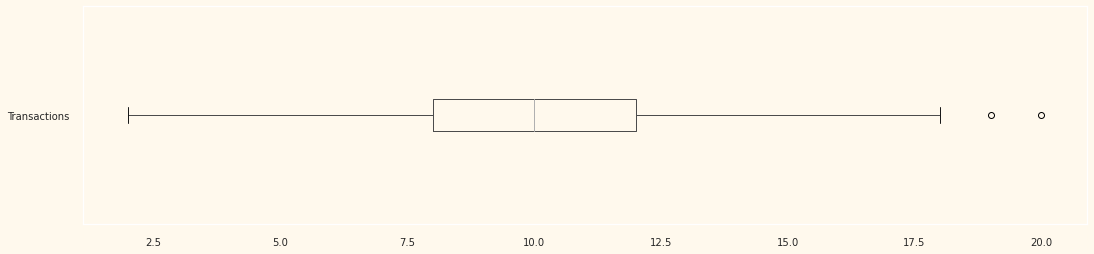

In [ ]:
df_clust0.boxplot(column=['Transactions'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

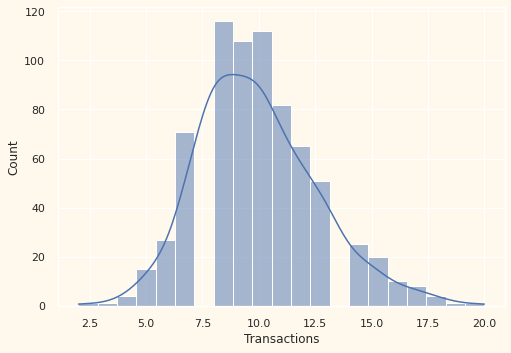

In [ ]:
norm = df_clust0['Transactions']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung sedikit outlier
> - Positive skewness Dist
> - Rata - rata (**median**)  = 10

###### **Average Price Per Customer**

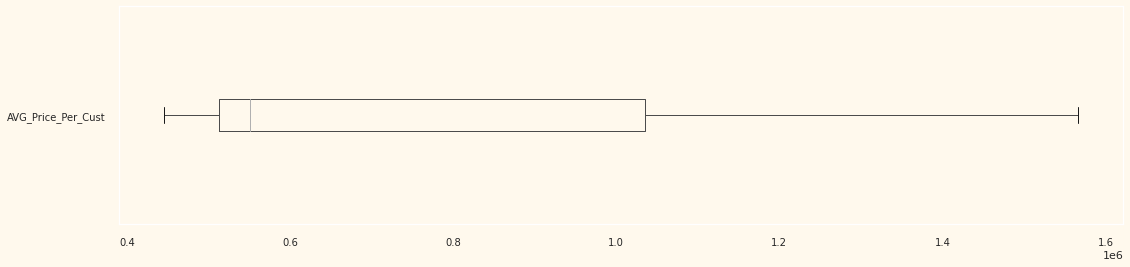

In [ ]:
df_clust0.boxplot(column=['AVG_Price_Per_Cust'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

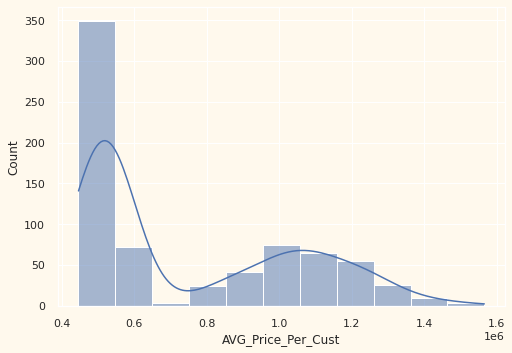

In [ ]:
norm = df_clust0['AVG_Price_Per_Cust']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data tidak mengandung outlier
> - Skewness Distribution
> - Rata - rata (**median**)  = Rp. 550.555/customer

###### **Sales Quantity**

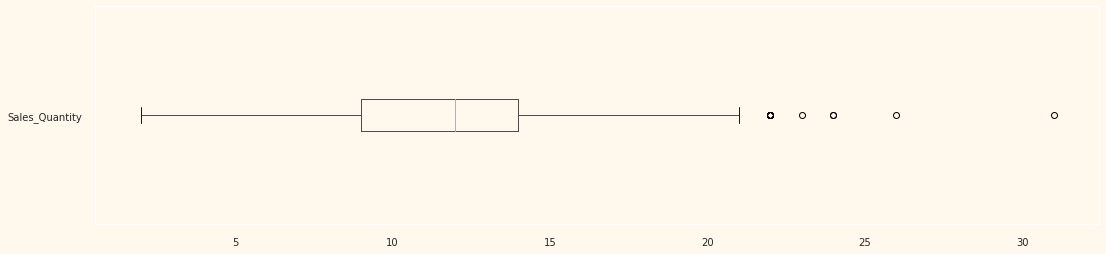

In [ ]:
df_clust0.boxplot(column=['Sales_Quantity'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

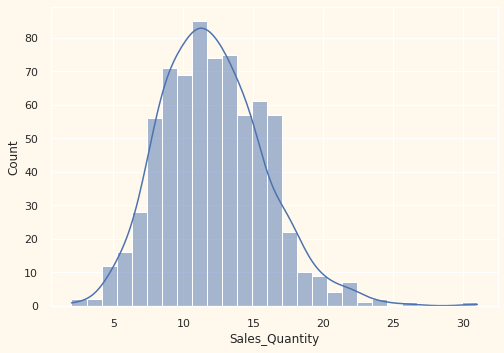

In [ ]:
norm = df_clust0['Sales_Quantity']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung outlier
> - Norm Distribution
> - Rata - rata (**median**)  = 12 (ABS)

###### **Revenue (Net)**

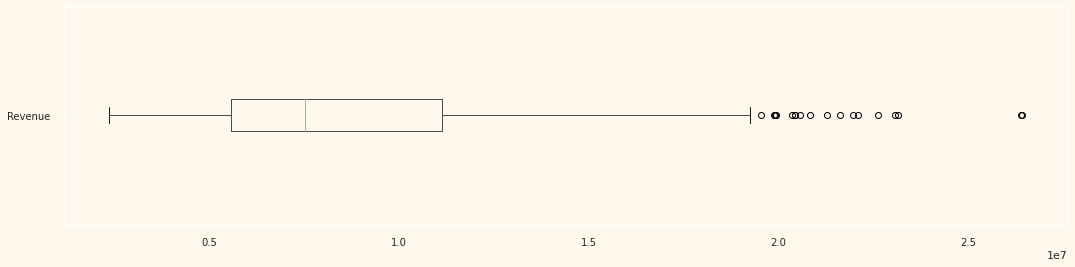

In [ ]:
df_clust0.boxplot(column=['Revenue'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

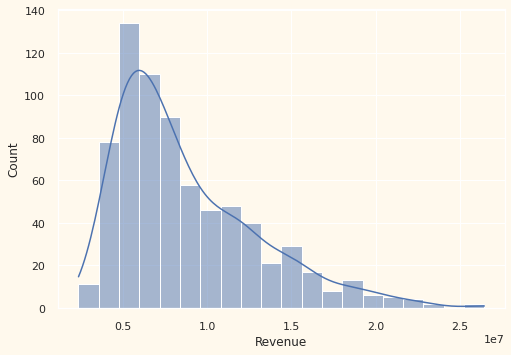

In [ ]:
norm = df_clust0['Revenue']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Mengandung banyak outlier
> - Positive Skew Dist
> - Rata - rata (**median**)  = Rp. 7.532.700

###### **Gross Merchandise Value**

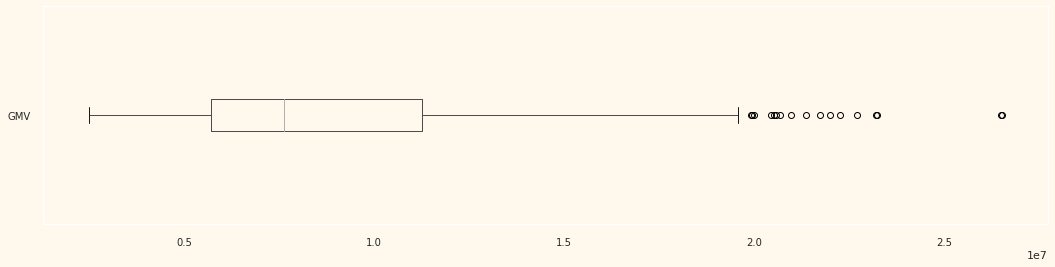

In [ ]:
df_clust0.boxplot(column=['GMV'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

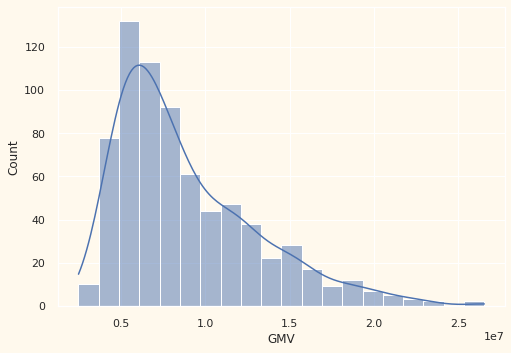

In [ ]:
norm = df_clust0['GMV']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung outlier
> - Positive skew Dist
> - Rata - rata (**median**)  = Rp. 7.640.000

###### **Average Order Value**

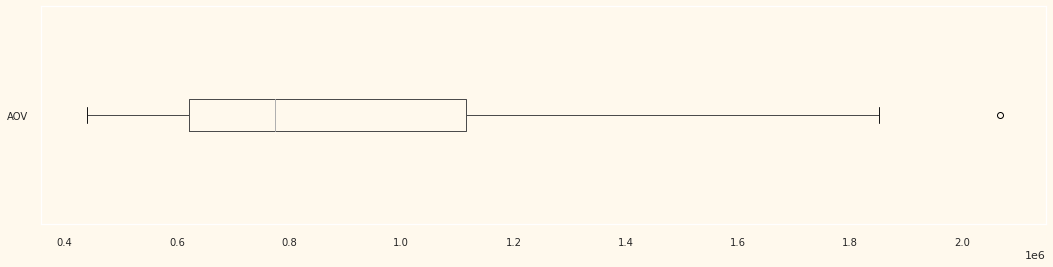

In [ ]:
df_clust0.boxplot(column=['AOV'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

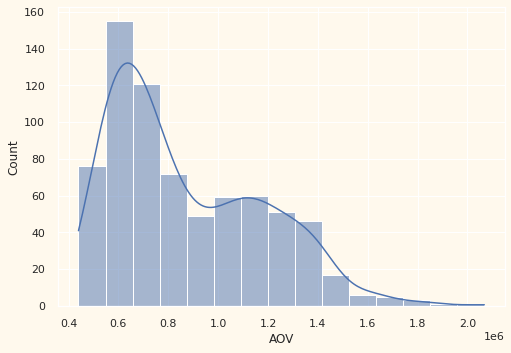

In [ ]:
norm = df_clust0['AOV']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Sedikit mengandung outlier
> - Positive skew dist.
> - Rata - rata (**median**)  = Rp. 774.835/Customer

###### **Conversion Rate**

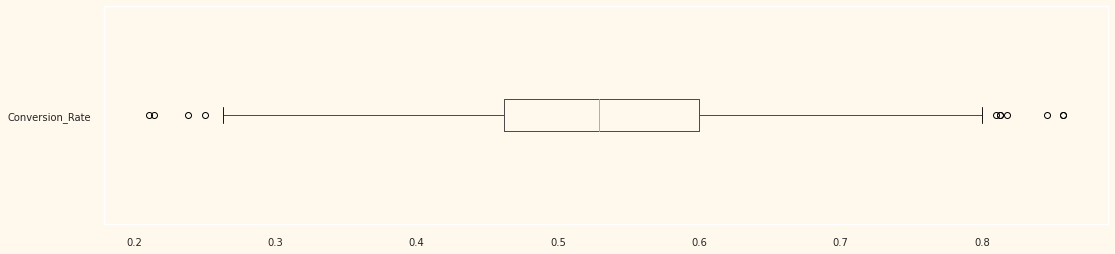

In [ ]:
df_clust0.boxplot(column=['Conversion_Rate'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

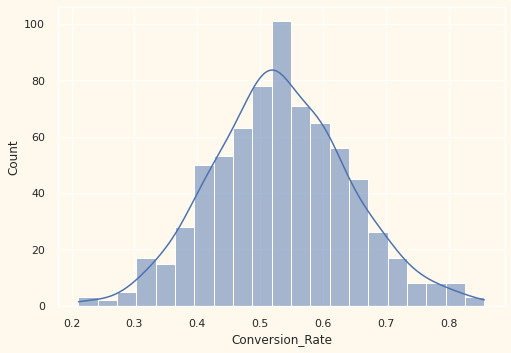

In [ ]:
norm = df_clust0['Conversion_Rate']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Norm dist.
> - Rata - rata (**mean/median**)  = 53.3%

###### **Recency**

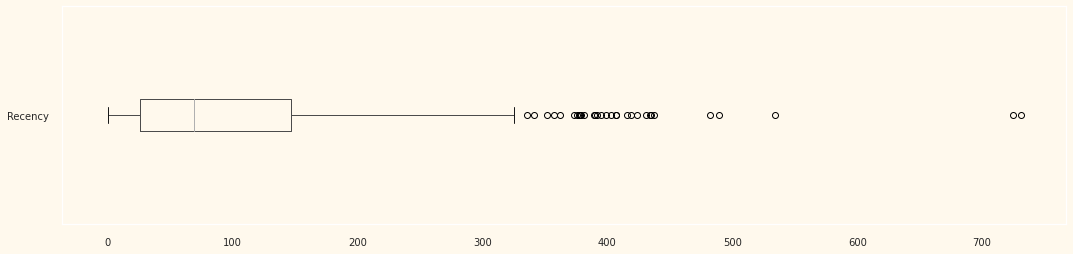

In [ ]:
df_clust0.boxplot(column=['Recency'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

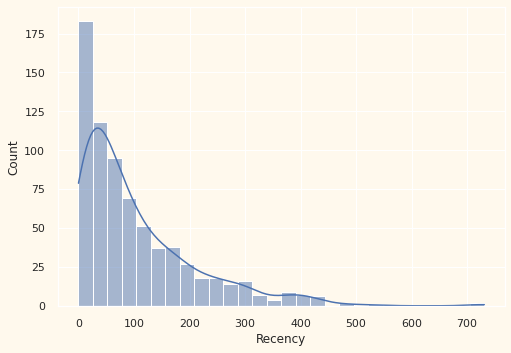

In [ ]:
norm = df_clust0['Recency']
sns.histplot(norm, kde=True)
plt.show()

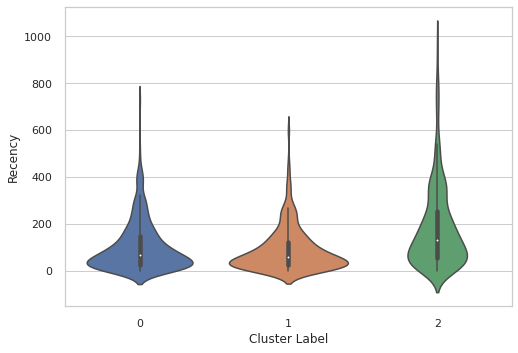

In [ ]:
sns.set(style = 'whitegrid')
sns.violinplot(x ="Cluster Label",
             y ="Recency",
             data = df_clust)

**Note** :
> - Outlier tinggi
> - Positive skew dist.
> - Rata - rata (**median**) = 1 - 2 bulan sejak pembelian terakhir oleh customer
> - Maksimum recency 731 hari

###### **Gender**

In [ ]:
df_gen = df_clust0.groupby(['Cluster Label', 'Gender']).agg({'User_Id':'nunique'}).reset_index()

df_gen['Percentage'] = df_gen['User_Id']/df_gen['User_Id'].sum()
df_gen

Cluster Label  Gender  User_Id  Percentage
0              0    male      459    0.635734
1              0  female      263    0.364266

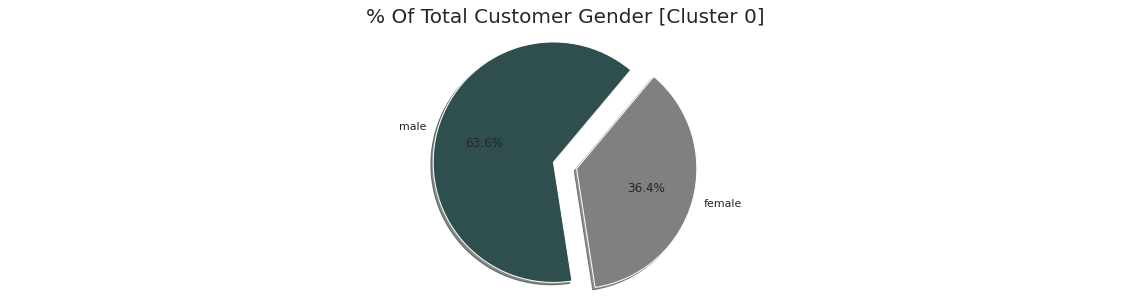

In [ ]:
my_colors = ['darkslategray','Gray']
my_explode = (0.1, 0.1)


plt.figure(figsize=(20,5))
plt.pie(df_gen['Percentage'], labels = df_gen['Gender'], autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('% Of Total Customer Gender [Cluster 0]',fontsize = 20)
plt.axis('equal')
plt.show()

###### **Inference (For Cluster 0)**
> - Dominan Pria
> - Rata - Rata Frekuensi Transaksi Per Customer Tinggi
> - Rata - Rata Nilai/Harga Barang (per customer) Tinggi
> - ABS **Rendah**
> - AOV Tinggi
> - Frequently purchased product categories :
>> - Game
>> - Sport Equipment
>> - Shoes
>> - Electronics
>> - Hobbies
> - Revenue (Net) Tinggi
> - Conversion Rate Tinggi
> - Pengguna Voucher (Tinggi)
> - Terbanyak untuk Pengguna Trf & CCard
> - Recency > Tinggi dibanding Cluster 1

##### **Cluster 1**

In [ ]:
fil_clust1 = (df_ident2['Cluster Label'] == 1)

# Number of outliers for the age attribute
df_clust1 = df_ident2.loc[fil_clust1]

print("Number Of Row Data: :",len(df_clust1), "row data, as follows :\n")

df_clust1.head()

Number Of Row Data: : 465 row data, as follows :



User_Id                     User_Name Gender     Province  Transactions  \
0    10084              Tasdik Sihombing   male  DKI Jakarta            42   
1    10005  Pranata Lega Firgantoro S.Pt   male  DKI Jakarta            30   
2    10007             Bancar Firgantoro   male  Jawa Tengah            30   
3    10006            Slamet Nashiruddin   male       Banten            27   
4    10013               Banara Sitompul   male  Jawa Tengah            27   

   AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0               76444             184  14475000            10   
1               90909             102   9445000             4   
2               94667             123  10135000            10   
3              112083             108  12635000            16   
4               86667             141  10040000             3   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit  Conversion_Rate  \
0               0  14625000  344643              25            0.560   
1               0   9620000  314833              26            0.385   
2               0  10310000  337833              30            0.333   
3               0  12710000  467963              24            0.375   
4               0  10190000  371852              21            0.429   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   
1          200000             8            9      18           6         0   
2          175000             7           15      12           3         0   
3          125000             5            9       6          21         0   
4          150000             6            9      15           3         0   

   NumdebCard  Recency  Tenure  Gender_Code  Cluster Label  
0           3       63    1037            0              1  
1           0      100     831            0              1  
2           0        2    1066            0              1  
3           0       63     873            0              1  
4           0       19     862            0              1

###### **Transactions**

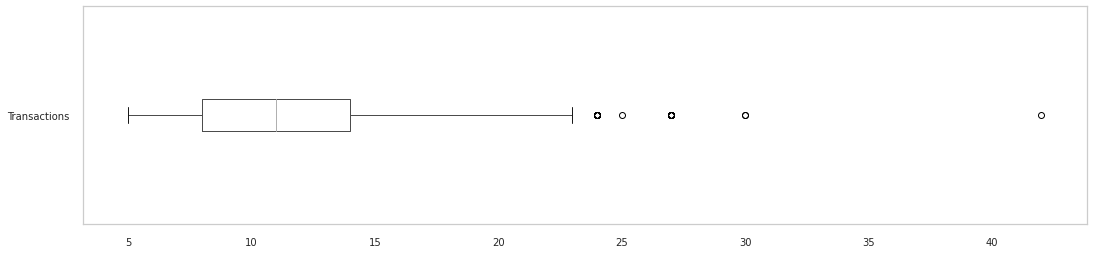

In [ ]:
df_clust1.boxplot(column=['Transactions'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

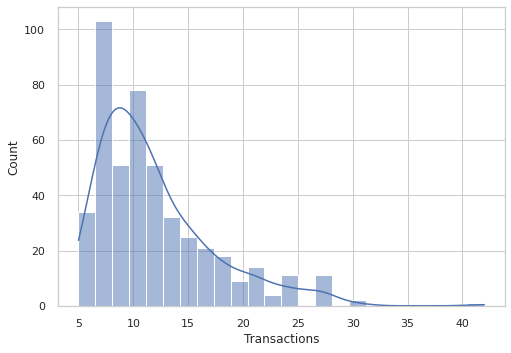

In [ ]:
norm = df_clust1['Transactions']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung sedikit outlier
> - Positive skewness Dist
> - Rata - rata (**median**)  = 11

###### **Average Price Per Customer**

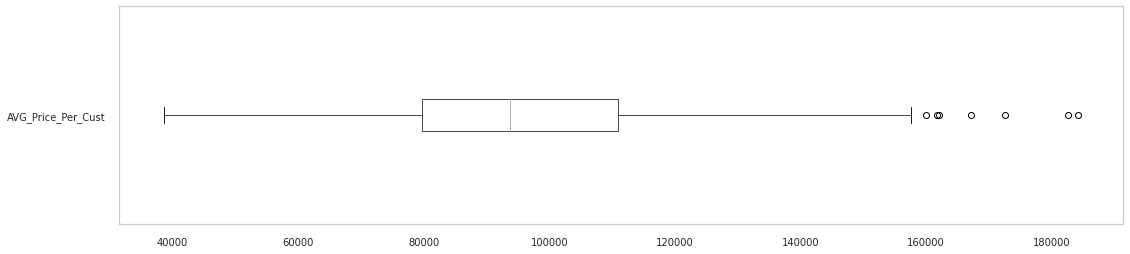

In [ ]:
df_clust1.boxplot(column=['AVG_Price_Per_Cust'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

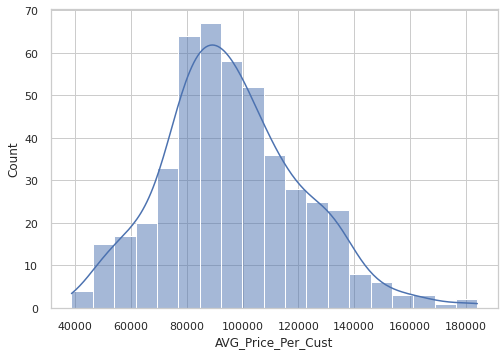

In [ ]:
norm = df_clust1['AVG_Price_Per_Cust']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung outlier
> - Norm Distribution
> - Rata - rata (**median**)  = Rp. 93.750/customer

###### **Sales Quantity**

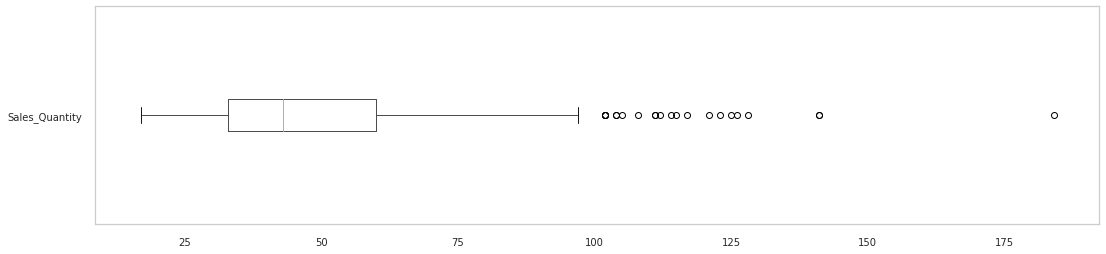

In [ ]:
df_clust1.boxplot(column=['Sales_Quantity'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

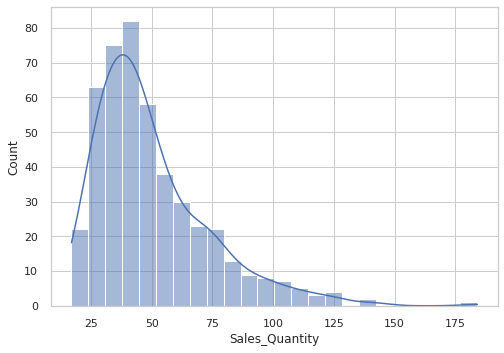

In [ ]:
norm = df_clust1['Sales_Quantity']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung outlier
> - Positive Skew Dist.
> - Rata - rata (**median**)  = 43 (ABS)

###### **Revenue (Net)**

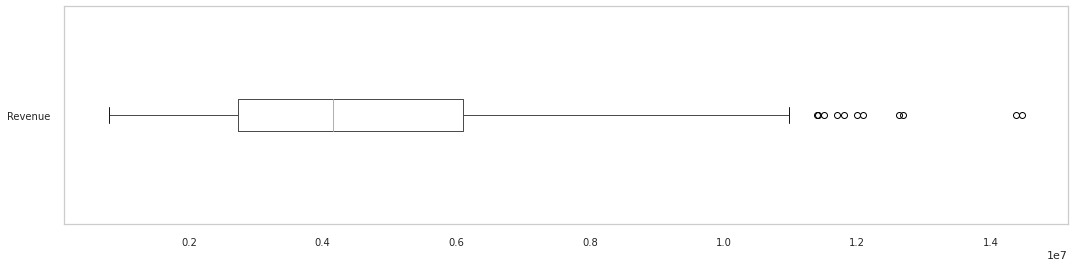

In [ ]:
df_clust1.boxplot(column=['Revenue'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

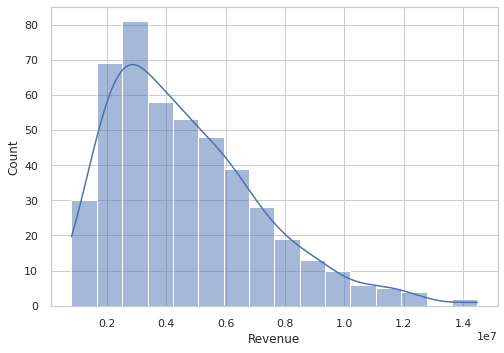

In [ ]:
norm = df_clust1['Revenue']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Mengandung outlier
> - Positive Skew Dist
> - Rata - rata (**median**)  = Rp. 4.160.000

###### **Gross Merchandise Value**

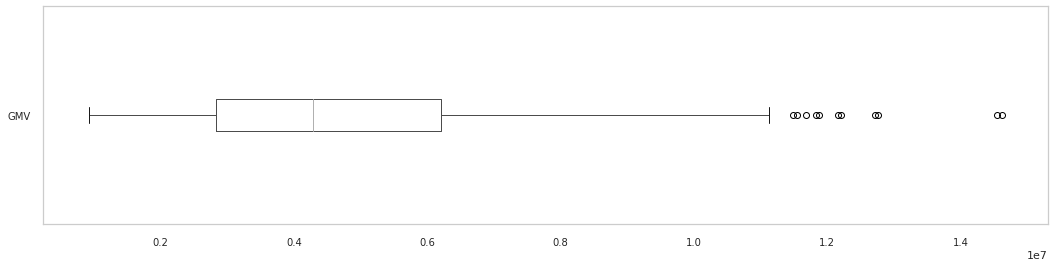

In [ ]:
df_clust1.boxplot(column=['GMV'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

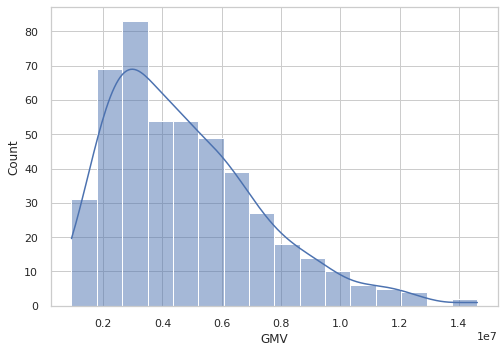

In [ ]:
norm = df_clust1['GMV']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung outlier
> - Positive skew Dist
> - Rata - rata (**median**)  = Rp. 4.290.000

###### **Average Order Value**

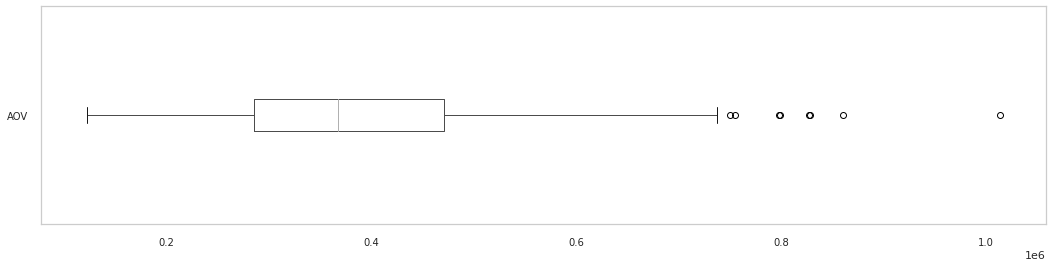

In [ ]:
df_clust1.boxplot(column=['AOV'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

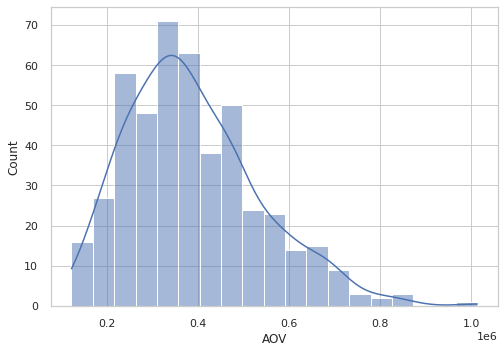

In [ ]:
norm = df_clust1['AOV']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Outlier
> - Norm dist.
> - Rata - rata (**median**)  = Rp. 368.125/Customer

###### **Conversion Rate**

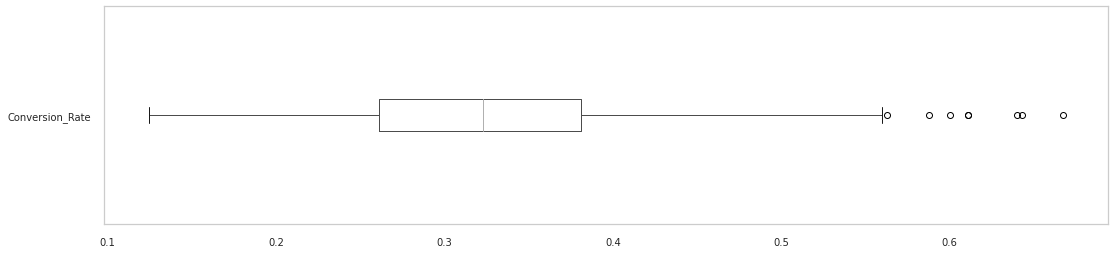

In [ ]:
df_clust1.boxplot(column=['Conversion_Rate'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

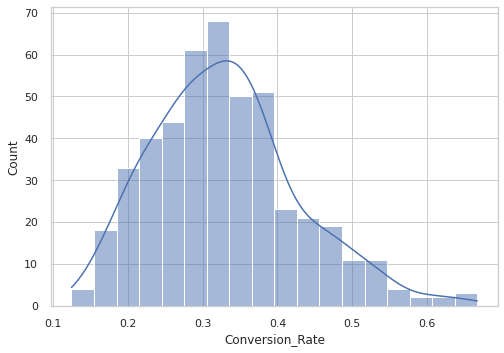

In [ ]:
norm = df_clust1['Conversion_Rate']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Positive Skew dist.
> - Rata - rata (**mean/median**)  = 33%

###### **Recency**

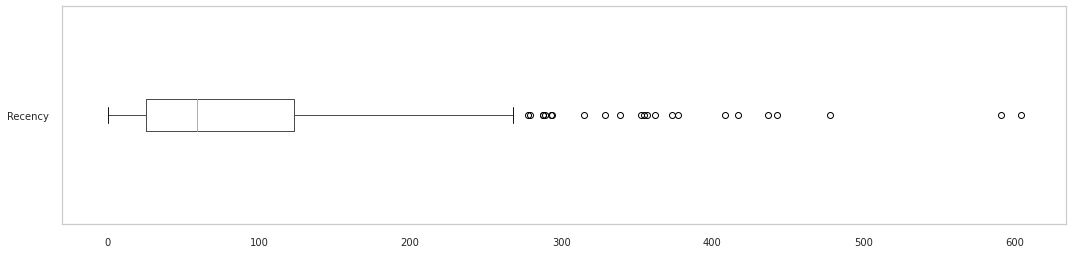

In [ ]:
df_clust1.boxplot(column=['Recency'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

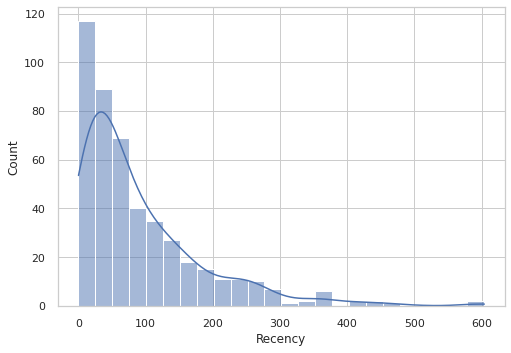

In [ ]:
norm = df_clust1['Recency']
sns.histplot(norm, kde=True)
plt.show()

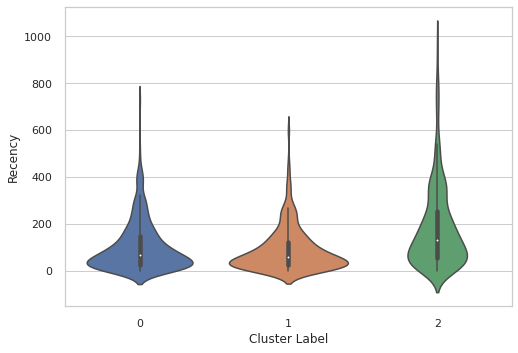

In [ ]:
sns.set(style = 'whitegrid')
sns.violinplot(x ="Cluster Label",
             y ="Recency",
             data = df_clust)

**Note** :
> - Outlier tinggi
> - Positive skew dist.
> - Rata - rata (**median**) = 4 bulan sejak pembelian terakhir oleh customer
> - Maksimum recency 604 hari

###### **Gender**

In [ ]:
df_gen = df_clust1.groupby(['Cluster Label', 'Gender']).agg({'User_Id':'nunique'}).reset_index()

df_gen['Percentage'] = df_gen['User_Id']/df_gen['User_Id'].sum()
df_gen

Cluster Label  Gender  User_Id  Percentage
0              1    male      358    0.769892
1              1  female      107    0.230108

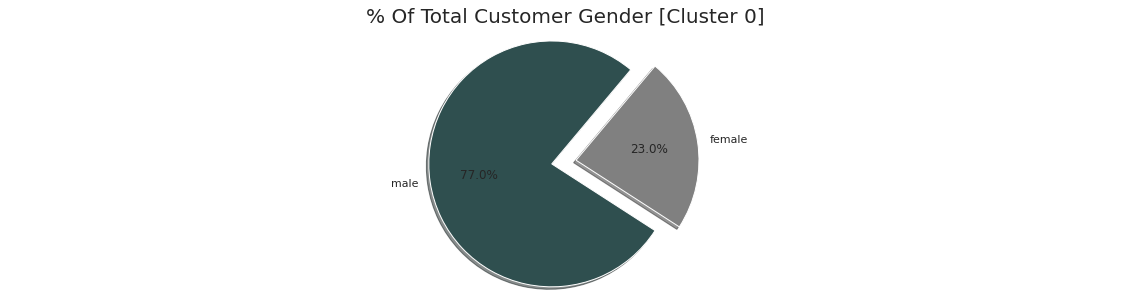

In [ ]:
my_colors = ['darkslategray','Gray']
my_explode = (0.1, 0.1)


plt.figure(figsize=(20,5))
plt.pie(df_gen['Percentage'], labels = df_gen['Gender'], autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('% Of Total Customer Gender [Cluster 0]',fontsize = 20)
plt.axis('equal')
plt.show()

###### **Inference (For Cluster 1)**
> - Dominan Pria
> - Rata - Rata Frekuensi Transaksi Per Customer Tinggi
> - Rata - Rata Nilai/Harga Barang (per customer) **Rendah**
> - ABS Tinggi
> - AOV **Rendah**
> - Frequently purchased product categories :
>> - Clothing
>> - Groceries
>> - Stationary
>> - Health & Beauty
>> - Mother_Care
> - Revenue (Net) Medium
> - Conversion Rate Rendah
> - Pengguna Voucher (Tinggi)
> - Terbanyak untuk Pengguna metode Trf & Paylater
> - Recency Rendah

##### **Cluster 2**

In [ ]:
fil_clust2 = (df_ident2['Cluster Label'] == 2)

# Number of outliers for the age attribute
df_clust2 = df_ident2.loc[fil_clust2]

print("Number Of Row Data: :",len(df_clust2), "row data, as follows :\n")

df_clust1.head()

Number Of Row Data: : 811 row data, as follows :



User_Id                     User_Name Gender     Province  Transactions  \
0    10084              Tasdik Sihombing   male  DKI Jakarta            42   
1    10005  Pranata Lega Firgantoro S.Pt   male  DKI Jakarta            30   
2    10007             Bancar Firgantoro   male  Jawa Tengah            30   
3    10006            Slamet Nashiruddin   male       Banten            27   
4    10013               Banara Sitompul   male  Jawa Tengah            27   

   AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0               76444             184  14475000            10   
1               90909             102   9445000             4   
2               94667             123  10135000            10   
3              112083             108  12635000            16   
4               86667             141  10040000             3   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit  Conversion_Rate  \
0               0  14625000  344643              25            0.560   
1               0   9620000  314833              26            0.385   
2               0  10310000  337833              30            0.333   
3               0  12710000  467963              24            0.375   
4               0  10190000  371852              21            0.429   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   
1          200000             8            9      18           6         0   
2          175000             7           15      12           3         0   
3          125000             5            9       6          21         0   
4          150000             6            9      15           3         0   

   NumdebCard  Recency  Tenure  Gender_Code  Cluster Label  
0           3       63    1037            0              1  
1           0      100     831            0              1  
2           0        2    1066            0              1  
3           0       63     873            0              1  
4           0       19     862            0              1

###### **Transactions**

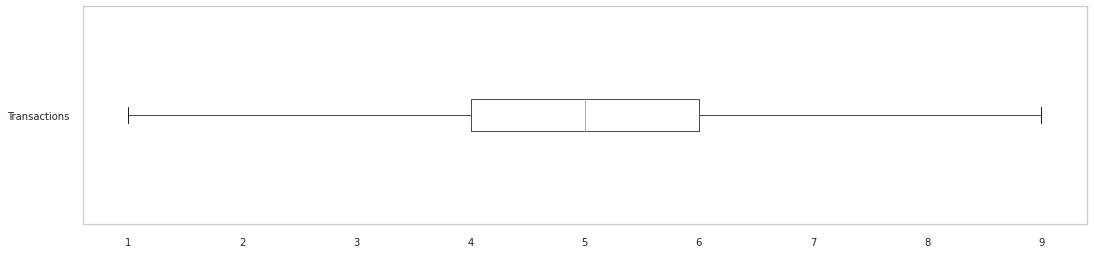

In [ ]:
df_clust2.boxplot(column=['Transactions'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

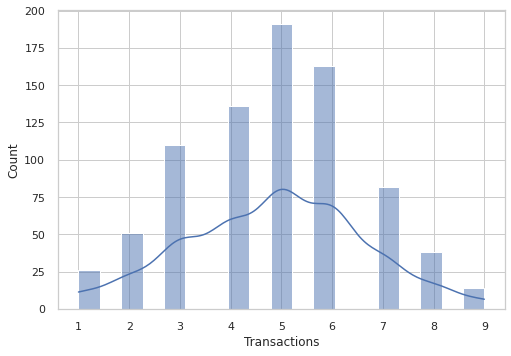

In [ ]:
norm = df_clust2['Transactions']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - tidak Mengandung outlier
> - Norm Dist
> - Rata - rata (**median**)  = 5

###### **Average Price Per Customer**

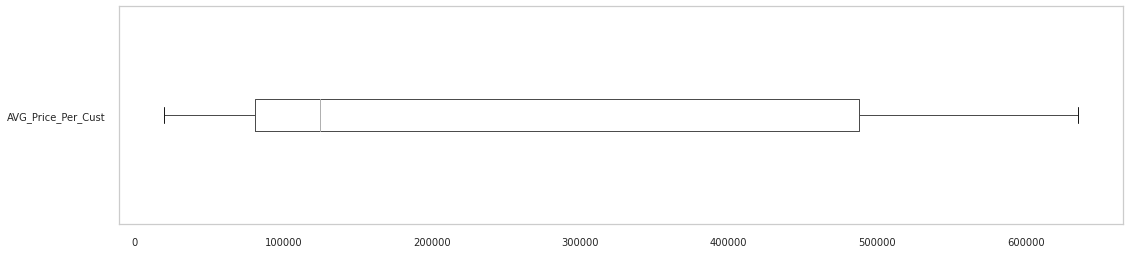

In [ ]:
df_clust2.boxplot(column=['AVG_Price_Per_Cust'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

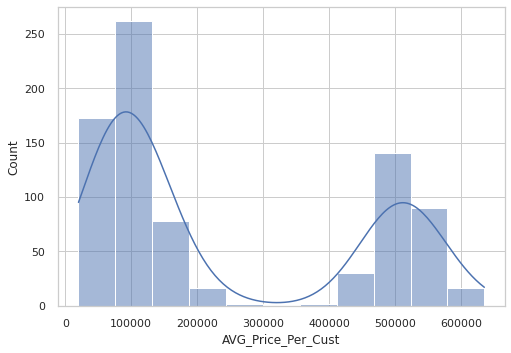

In [ ]:
norm = df_clust2['AVG_Price_Per_Cust']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung outlier
> - Rata - rata (**median**)  = Rp. 125.000/Customer

###### **Sales Quantity**

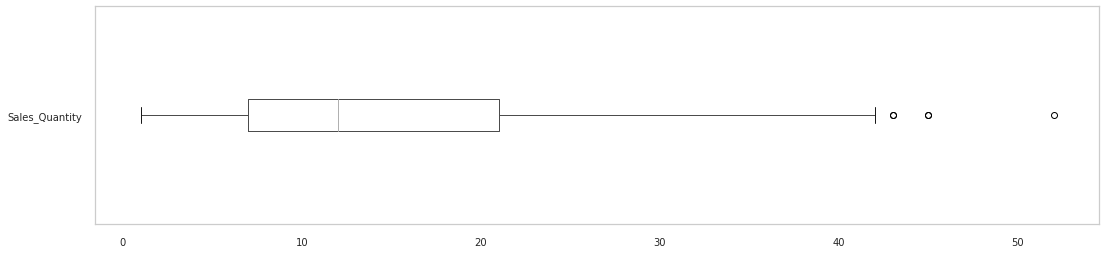

In [ ]:
df_clust2.boxplot(column=['Sales_Quantity'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

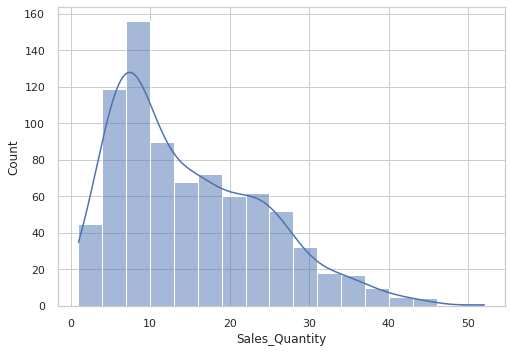

In [ ]:
norm = df_clust2['Sales_Quantity']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung outlier
> - Positive Skew Distribution
> - Rata - rata (**median**)  = 12 (ABS)

###### **Revenue (Net)**

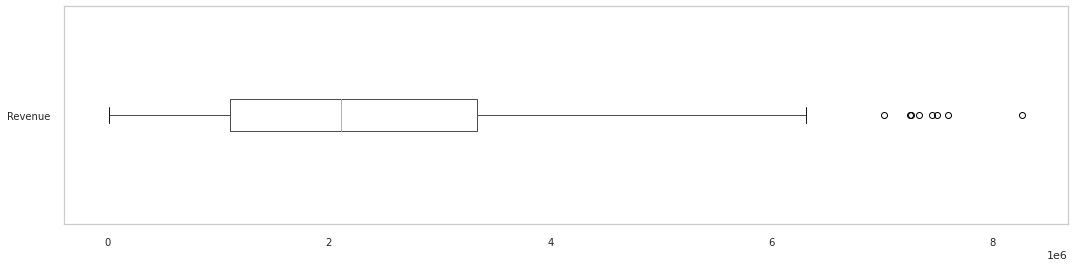

In [ ]:
df_clust2.boxplot(column=['Revenue'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

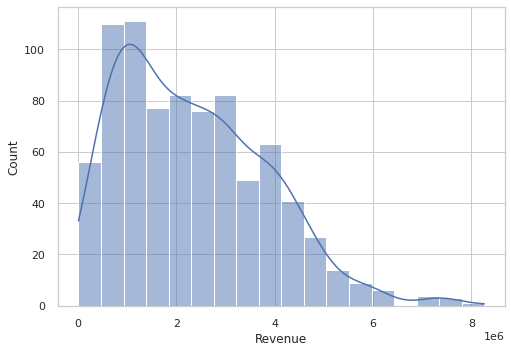

In [ ]:
norm = df_clust2['Revenue']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Mengandung outlier
> - Positive Skew Dist
> - Rata - rata (**median**)  = Rp. 2.110.000

###### **Gross Merchandise Value**

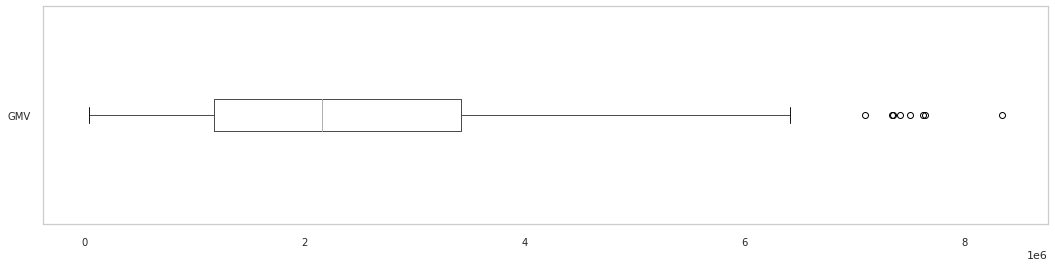

In [ ]:
df_clust2.boxplot(column=['GMV'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

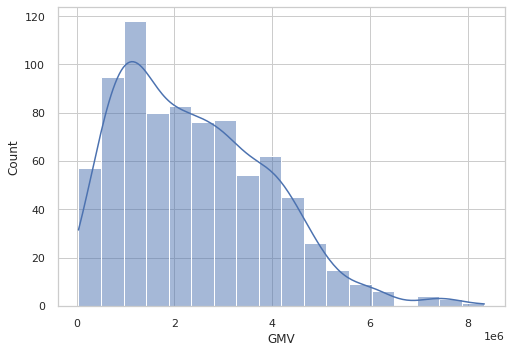

In [ ]:
norm = df_clust2['GMV']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Data mengandung outlier
> - Positive skew Dist
> - Rata - rata (**median**)  = Rp. 2.160.000

###### **Average Order Value**

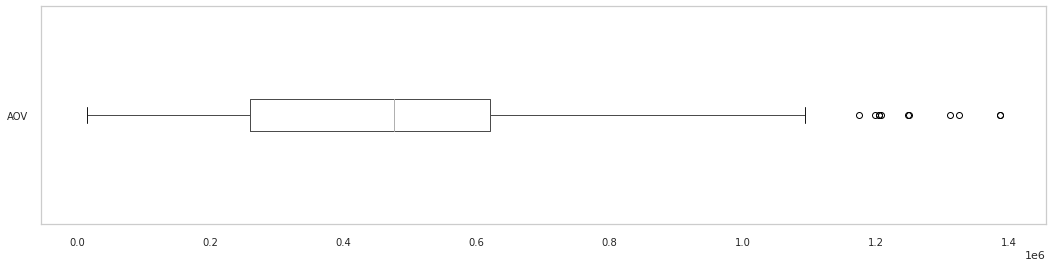

In [ ]:
df_clust2.boxplot(column=['AOV'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

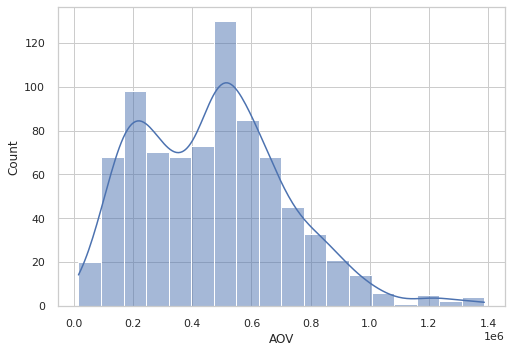

In [ ]:
norm = df_clust2['AOV']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Outlier
> - Norm dist.
> - Rata - rata (**median**)  = Rp. 476.667/Customer

###### **Conversion Rate**

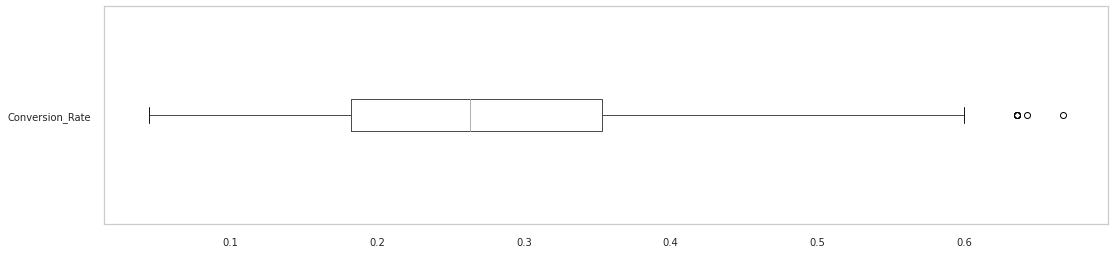

In [ ]:
df_clust2.boxplot(column=['Conversion_Rate'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

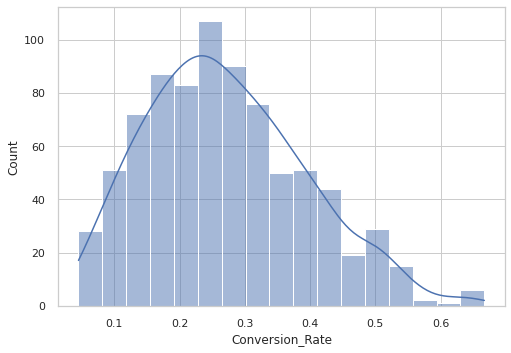

In [ ]:
norm = df_clust2['Conversion_Rate']
sns.histplot(norm, kde=True)
plt.show()

**Note** :
> - Norm dist.
> - Rata - rata (**mean/median**)  = 26.3%

###### **Recency**

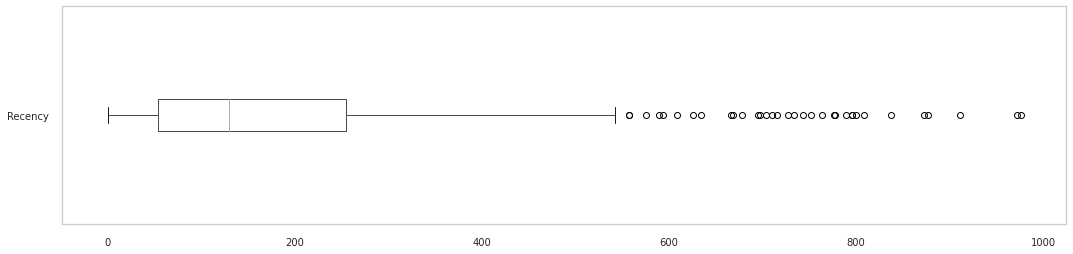

In [ ]:
df_clust2.boxplot(column=['Recency'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

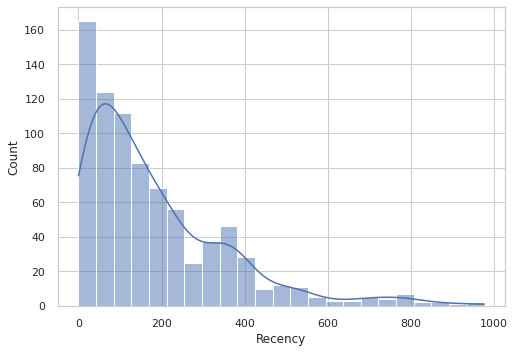

In [ ]:
norm = df_clust2['Recency']
sns.histplot(norm, kde=True)
plt.show()

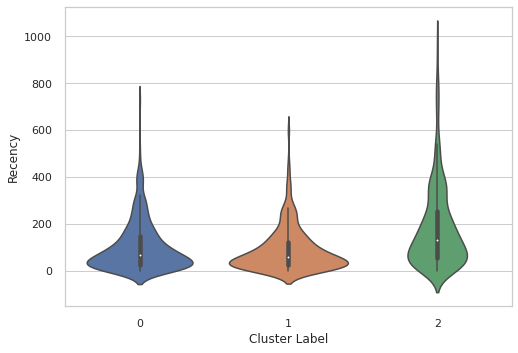

In [ ]:
sns.set(style = 'whitegrid')
sns.violinplot(x ="Cluster Label",
             y ="Recency",
             data = df_clust)

**Note** :
> - Outlier tinggi
> - Positive skew dist.
> - Rata - rata (**median**) = 1 - 4 bulan sejak pembelian terakhir oleh customer
> - Maksimum recency 976 hari

###### **Gender**

In [ ]:
df_gen = df_clust2.groupby(['Cluster Label', 'Gender']).agg({'User_Id':'nunique'}).reset_index()

df_gen['Percentage'] = df_gen['User_Id']/df_gen['User_Id'].sum()
df_gen

Cluster Label  Gender  User_Id  Percentage
0              2    male      481    0.593095
1              2  female      330    0.406905

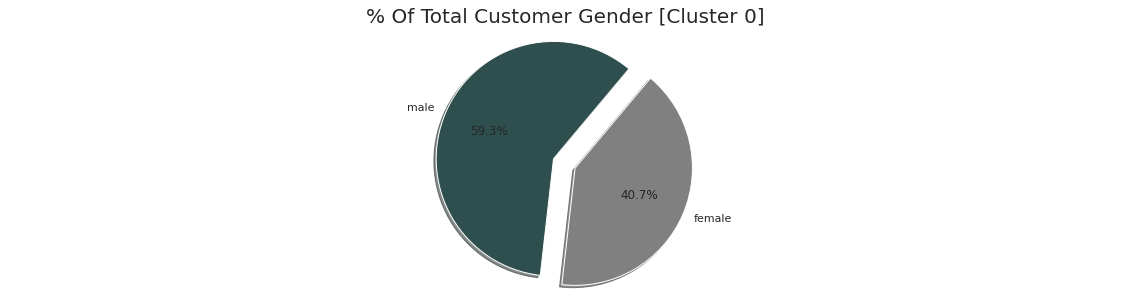

In [ ]:
my_colors = ['darkslategray','Gray']
my_explode = (0.1, 0.1)


plt.figure(figsize=(20,5))
plt.pie(df_gen['Percentage'], labels = df_gen['Gender'], autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('% Of Total Customer Gender [Cluster 0]',fontsize = 20)
plt.axis('equal')
plt.show()

###### **Inference (For Cluster 2)**
> - Dominan Pria
> - Rata - Rata Frekuensi Transaksi Per Customer **Rendah**
> - Rata - Rata Nilai/Harga Barang (per customer) Medium
> - ABS **Rendah**
> - AOV > Tinggi dibanding cluster 1
> - Frequently purchased product categories :
>> - Clothing
>> - Groceries
>> - Stationary
>> - Health & Beauty
>> - Sport
>> - Shoes
> - Revenue (Net) **Rendah**
> - Conversion Rate **Rendah**
> - Pengguna Voucher (**Rendah**)
> - Terbanyak untuk Pengguna Trf & Paylater
> - Recency **Tinggi**

# **Infference From Each Cluster**

> **Cluster 0**
> - Dominan Pria
> - Rata - Rata Frekuensi Transaksi Per Customer Tinggi
> - Rata - Rata Nilai/Harga Barang (per customer) Tinggi
> - ABS **Rendah**
> - AOV Tinggi
> - Frequently purchased product categories :
>> - Game
>> - Sport Equipment
>> - Shoes
>> - Electronics
>> - Hobbies
> - Revenue (Net) Tinggi
> - Conversion Rate Tinggi
> - Pengguna Voucher (Tinggi)
> - Terbanyak untuk Pengguna Trf & CCard
> - Recency > Tinggi dibanding Cluster 1


> **Cluster 1**
> - Dominan Pria
> - Rata - Rata Frekuensi Transaksi Per Customer Tinggi
> - Rata - Rata Nilai/Harga Barang (per customer) **Rendah**
> - ABS Tinggi
> - AOV **Rendah**
> - Frequently purchased product categories :
>> - Clothing
>> - Groceries
>> - Stationary
>> - Health & Beauty
>> - Mother_Care
> - Revenue (Net) Medium
> - Conversion Rate Rendah
> - Pengguna Voucher (Tinggi)
> - Terbanyak untuk Pengguna metode Trf & Paylater
> - Recency Rendah

> **Cluster 2**
> - Dominan Pria
> - Rata - Rata Frekuensi Transaksi Per Customer **Rendah**
> - Rata - Rata Nilai/Harga Barang (per customer) Medium
> - ABS **Rendah**
> - AOV > Tinggi dibanding cluster 1
> - Frequently purchased product categories :
>> - Clothing
>> - Groceries
>> - Stationary
>> - Health & Beauty
>> - Sport
>> - Shoes
> - Revenue (Net) **Rendah**
> - Conversion Rate **Rendah**
> - Pengguna Voucher (**Rendah**)
> - Terbanyak untuk Pengguna Trf & Paylater
> - Recency **Tinggi**

# **EDA Cluster**

In [ ]:
df_eda = df_clust.copy()

In [ ]:
gender = df_eda.groupby(['Gender']).agg({'User_Id':'nunique'})
gender

User_Id
Gender         
male       1298
female      700

In [ ]:
gender = df_eda.groupby(['Cluster Label','Gender']).agg({'User_Id':'nunique'})
gender

User_Id
Cluster Label Gender         
0             male        459
              female      263
1             male        358
              female      107
2             male        481
              female      330

In [ ]:
gender = df_eda.groupby(['Cluster Label','NumEWallet']).agg({'User_Id':'nunique'})
gender

User_Id
Cluster Label NumEWallet         
0             0                96
              1               194
              2               203
              3               131
              4                67
              5                22
              6                 9
1             0                98
              1                65
              2               102
              3                94
              4                35
              5                15
              6                30
              7                 7
              8                 2
              9                10
              10                1
              12                3
              13                1
              21                2
2             0               290
              1               286
              2               157
              3                53
              4                15
              5                 3
              6                 7

In [ ]:
# Handling Outlier For The Age Attribute
fil_clust = df_eda['Cluster Label'] == 1

# Number of outliers for the age attribute
cluster_1 = df_eda.loc[fil_clust]

print("Number of outliers for the age attribute: :",len(cluster_1), "row data, as follows :\n")

# Identify outlier
cluster_1.head()

Number of outliers for the age attribute: : 465 row data, as follows :



User_Id                     User_Name Register_Date Gender     Province  \
0    10084              Tasdik Sihombing    2019-02-27   male  DKI Jakarta   
1    10005  Pranata Lega Firgantoro S.Pt    2019-09-21   male  DKI Jakarta   
2    10007             Bancar Firgantoro    2019-01-29   male  Jawa Tengah   
3    10006            Slamet Nashiruddin    2019-08-10   male       Banten   
4    10013               Banara Sitompul    2019-08-21   male  Jawa Tengah   

              City First_Activity Last_Activity   Max_Date  Transactions  \
0    South Jakarta     2019-02-27    2021-10-28 2021-12-30            42   
1  Jakarta Selatan     2019-09-22    2021-09-21 2021-12-30            30   
2         Semarang     2019-02-01    2021-12-28 2021-12-30            30   
3   Kota Tangerang     2019-10-10    2021-10-28 2021-12-30            27   
4         Semarang     2019-08-21    2021-12-11 2021-12-30            27   

   Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0       1               76444             184  14475000            10   
1       1               90909             102   9445000             4   
2       0               94667             123  10135000            10   
3       3              112083             108  12635000            16   
4       0               86667             141  10040000             3   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit  Conversion_Rate  \
0               0  14625000  344643              25            0.560   
1               0   9620000  314833              26            0.385   
2               0  10310000  337833              30            0.333   
3               0  12710000  467963              24            0.375   
4               0  10190000  371852              21            0.429   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   
1          200000             8            9      18           6         0   
2          175000             7           15      12           3         0   
3          125000             5            9       6          21         0   
4          150000             6            9      15           3         0   

   NumdebCard  Recency  Tenure  Gender_Code  Cluster Label  
0           3       63    1037            0              1  
1           0      100     831            0              1  
2           0        2    1066            0              1  
3           0       63     873            0              1  
4           0       19     862            0              1

In [ ]:
# from google.colab import files
# cluster_1.to_csv('cluster_1.csv')
# files.download('cluster_1.csv')

### **Kmeans Clustering**

In [ ]:
df_clust_km = df_ecom.copy()
df_clust_km.head(6)

User_Id                     User_Name Register_Date Gender     Province  \
0    10084              Tasdik Sihombing    2019-02-27   male  DKI Jakarta   
1    10005  Pranata Lega Firgantoro S.Pt    2019-09-21   male  DKI Jakarta   
2    10007             Bancar Firgantoro    2019-01-29   male  Jawa Tengah   
3    10006            Slamet Nashiruddin    2019-08-10   male       Banten   
4    10013               Banara Sitompul    2019-08-21   male  Jawa Tengah   
5    10018             Harsanto Simbolon    2020-01-22   male  DKI Jakarta   

              City First_Activity Last_Activity   Max_Date  Transactions  \
0    South Jakarta     2019-02-27    2021-10-28 2021-12-30            42   
1  Jakarta Selatan     2019-09-22    2021-09-21 2021-12-30            30   
2         Semarang     2019-02-01    2021-12-28 2021-12-30            30   
3   Kota Tangerang     2019-10-10    2021-10-28 2021-12-30            27   
4         Semarang     2019-08-21    2021-12-11 2021-12-30            27   
5  Jakarta Selatan     2020-01-26    2021-10-24 2021-12-30            27   

   Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  Cloth_Amount  \
0       1               76444             184  14475000            10   
1       1               90909             102   9445000             4   
2       0               94667             123  10135000            10   
3       3              112083             108  12635000            16   
4       0               86667             141  10040000             3   
5       0              104815             128  12685000             9   

   Groceries_Amount  Stationary_Amount  Game_Amount  Health_Beauty_Amount  \
0                10                  9            0                    10   
1                 7                  6            0                    10   
2                 6                  5            0                     4   
3                11                  0            0                     7   
4                11                  7            0                     4   
5                 6                  5            0                     2   

   Mother_Care_Amount  Sport_equipt_Amount  Shoes_Amont  Electronics_Amount  \
0                   6                    0            0                   0   
1                   6                    0            0                   0   
2                   5                    0            0                   0   
3                   2                    0            0                   0   
4                   2                    0            0                   0   
5                   5                    0            0                   0   

   Hobbies_Amount       GMV     AOV  Customer_Visit  Conversion_Rate  \
0               0  14625000  344643              25            0.560   
1               0   9620000  314833              26            0.385   
2               0  10310000  337833              30            0.333   
3               0  12710000  467963              24            0.375   
4               0  10190000  371852              21            0.429   
5               0  12760000  469815              20            0.450   

   Voucher_Amount  Voucher_Used  NumPayLater  NumTrf  NumEWallet  NumCCard  \
0          175000             7            3      12          21         6   
1          200000             8            9      18           6         0   
2          175000             7           15      12           3         0   
3          125000             5            9       6          21         0   
4          150000             6            9      15           3         0   
5           75000             3            6      18           3         0   

   NumdebCard  Recency  Tenure  Gender_Code  
0           3       63    1037            0  
1           0      100     831            0  
2           0        2    1066            0  
3           0       63     873            0  
4           0       19     862     

In [ ]:
df_km = df_ecom[['Transactions',
                 'Recency','Tenure']]
df_km.head(6)

Transactions  Recency  Tenure
0            42       63    1037
1            30      100     831
2            30        2    1066
3            27       63     873
4            27       19     862
5            27       67     708

#### **Data Scalling - Kmeans Clustering**

In [ ]:
scaler = StandardScaler()
scaler.fit(df_km)

df_km_scaled = pd.DataFrame(scaler.transform(df_km), columns = df_km.columns)
print("All features are now scaled")

All features are now scaled


In [ ]:
df_km_scaled.head(6)

Transactions   Recency    Tenure
0      7.652306 -0.492817  0.767026
1      4.923331 -0.232698 -0.422992
2      4.923331 -0.921661  0.934553
3      4.241088 -0.492817 -0.180367
4      4.241088 -0.802147 -0.243912
5      4.241088 -0.464696 -1.133537

#### **Dimensionality Reduction - Kmeans Clustering**

In [ ]:
pca = PCA(n_components = 3)
pca.fit(df_km_scaled)

df_cluster_pca_km = pd.DataFrame(pca.fit_transform(df_km_scaled), columns = (['PCA1', 'PCA2','PCA3']))
df_cluster_pca_km

PCA1      PCA2      PCA3
0     6.050919  0.243011  4.766162
1     3.413875 -0.462939  3.550128
2     4.417188  0.073718  2.538712
3     3.180365 -0.460348  2.817017
4     3.311193 -0.716019  2.685717
...        ...       ...       ...
1993 -3.970218  3.379472  1.619846
1994 -3.217434 -4.118582  0.875170
1995 -3.556273 -0.785792  1.210435
1996 -1.625592  0.503303 -0.736300
1997 -3.397072 -1.195556  1.050837

[1998 rows x 3 columns]

In [ ]:
X_km = df_cluster_pca_km.iloc[:,:3].values
X_km

array([[ 6.05091923,  0.24301072,  4.76616224],
       [ 3.41387503, -0.46293924,  3.55012759],
       [ 4.41718777,  0.07371841,  2.5387117 ],
       ...,
       [-3.55627347, -0.78579167,  1.21043512],
       [-1.62559152,  0.50330323, -0.73630023],
       [-3.39707189, -1.19555598,  1.05083655]])

#### **Clustering**

In [ ]:
# km = KMeans(n_clusters=3, init="k-means++", random_state = 0)

# y_clust = km.fit_predict(X_km)
# y_clust

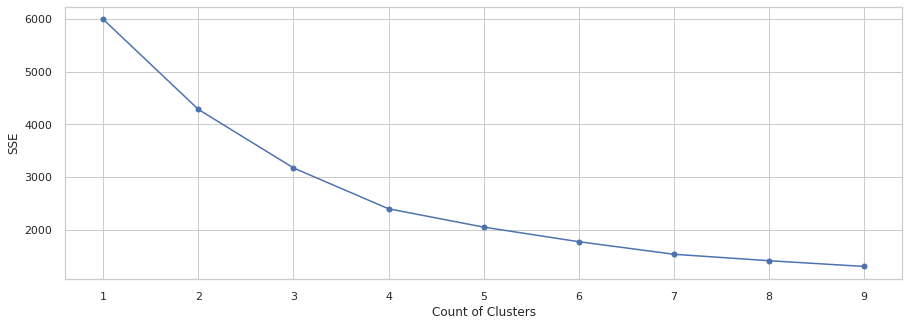

In [ ]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit_predict(X_km)
    sse.append(km.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), sse, '-o')
plt.xlabel('Count of Clusters')
plt.ylabel('SSE');

For n_clusters = 2 The average silhouette_score is : 0.322816447459808
For n_clusters = 3 The average silhouette_score is : 0.3560765248422718
For n_clusters = 4 The average silhouette_score is : 0.3313250320860672


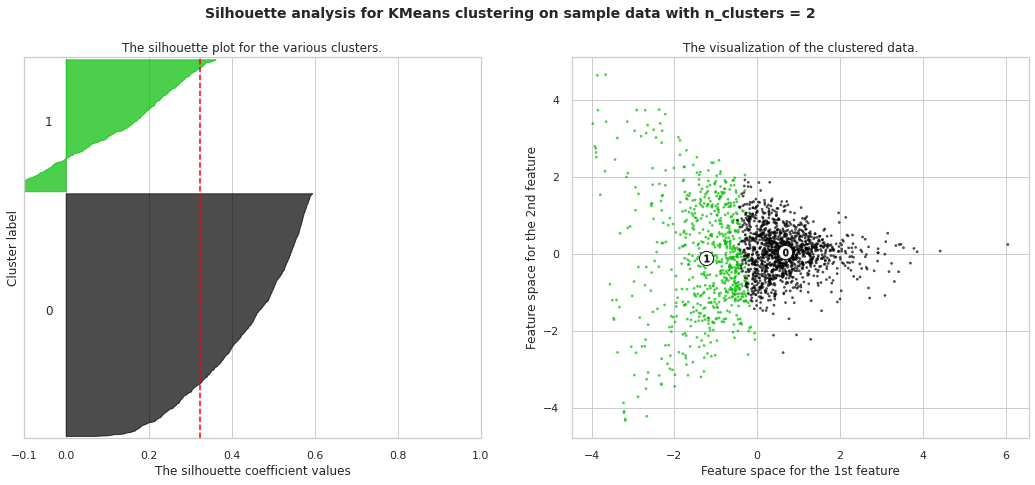

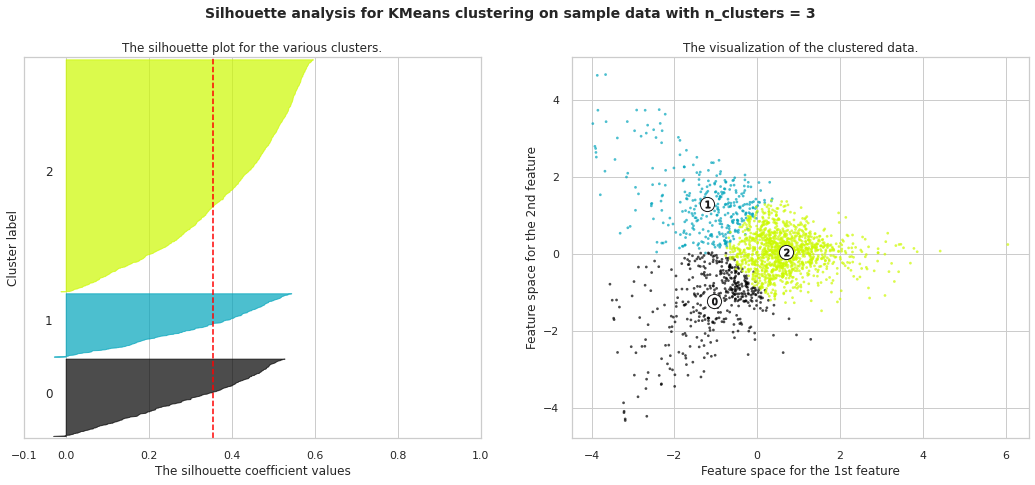

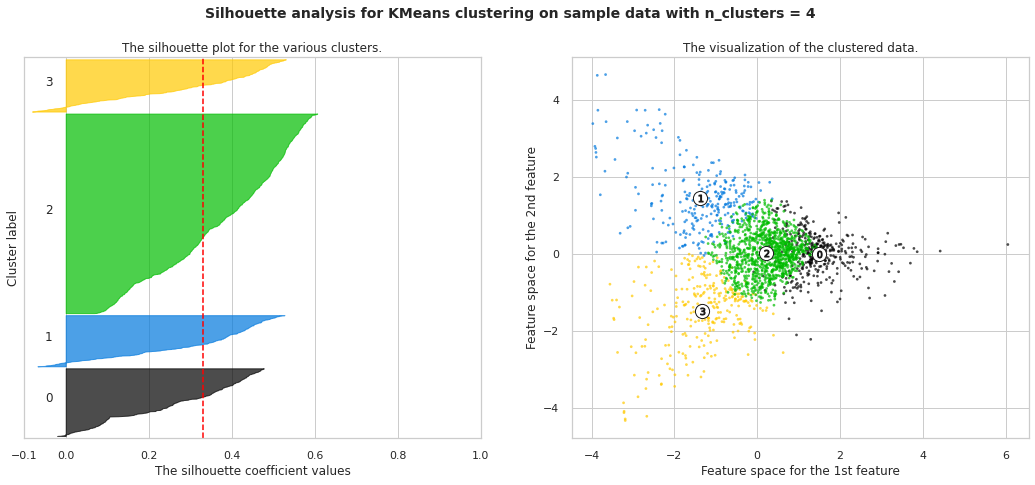

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_km) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_km)

    silhouette_avg = silhouette_score(X_km, cluster_labels)
    print("For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_km, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_km[:, 0], X_km[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [ ]:
km = KMeans(n_clusters=3, init="k-means++", random_state = 0)

y_clust = km.fit_predict(X_km)
y_clust

array([0, 0, 0, ..., 1, 2, 1], dtype=int32)

In [ ]:
centroid = km.cluster_centers_
centroid

array([[ 0.68502171,  0.04951132, -0.136934  ],
       [-1.04995119, -1.21876146,  0.12741772],
       [-1.2228007 ,  1.30659833,  0.34509004]])

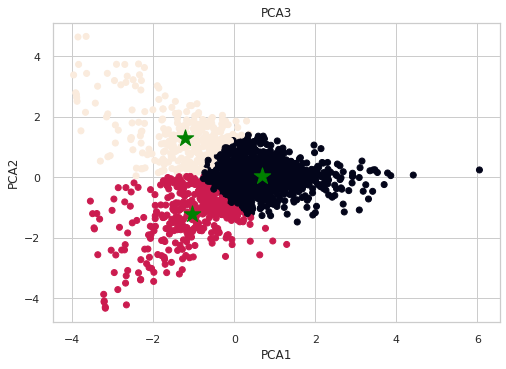

In [ ]:
plt.scatter(df_cluster_pca_km.iloc[:,0],df_cluster_pca_km.iloc[:,1],c=y_clust)
plt.scatter(centroid[:,0],centroid[:,1],marker='*',color='green',s=300)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA3')
plt.show()

In [ ]:
print(X_km[y_clust == 0,0][1])
print(X_km[y_clust == 0,1][1])
print(X_km[y_clust == 0,2][1])

3.4138750298450784
-0.4629392381926434
3.5501275866520428


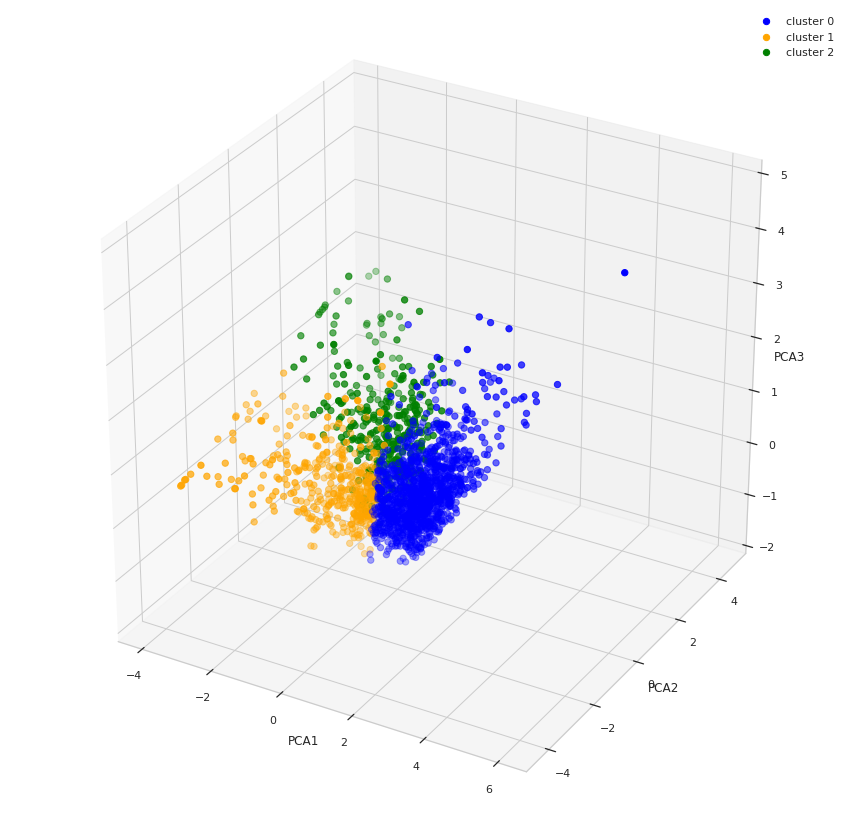

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_km[y_clust == 0,0],X_km[y_clust == 0,1],X_km[y_clust == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X_km[y_clust == 1,0],X_km[y_clust == 1,1],X_km[y_clust == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X_km[y_clust == 2,0],X_km[y_clust == 2,1],X_km[y_clust == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()

In [ ]:
# Menambahkan Hasil Clustering Ke Setiap Dataset
df_cluster_pca_km["Cluster Label"] = y_clust
df_clust_km["Cluster Label"] = y_clust
df_km["Cluster Label"] = y_clust

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clust_km

User_Id                     User_Name Register_Date  Gender  \
0       10084              Tasdik Sihombing    2019-02-27    male   
1       10005  Pranata Lega Firgantoro S.Pt    2019-09-21    male   
2       10007             Bancar Firgantoro    2019-01-29    male   
3       10006            Slamet Nashiruddin    2019-08-10    male   
4       10013               Banara Sitompul    2019-08-21    male   
...       ...                           ...           ...     ...   
1993    20404       Jane Shakila Nurdiyanti    2019-08-08  female   
1994    20430            Oni Lidya Haryanti    2021-11-19  female   
1995    10469                 Kayun Siregar    2020-11-14    male   
1996    20208   Nilam Suci Pudjiastuti S.Pd    2019-07-18  female   
1997    10483            Harimurti Prasasta    2020-12-10    male   

         Province             City First_Activity Last_Activity   Max_Date  \
0     DKI Jakarta    South Jakarta     2019-02-27    2021-10-28 2021-12-30   
1     DKI Jakarta  Jakarta Selatan     2019-09-22    2021-09-21 2021-12-30   
2     Jawa Tengah         Semarang     2019-02-01    2021-12-28 2021-12-30   
3          Banten   Kota Tangerang     2019-10-10    2021-10-28 2021-12-30   
4     Jawa Tengah         Semarang     2019-08-21    2021-12-11 2021-12-30   
...           ...              ...            ...           ...        ...   
1993  DKI Jakarta    Jakarta Timur     2019-08-11    2019-08-11 2021-12-30   
1994  DKI Jakarta    Jakarta Utara     2021-11-19    2021-11-19 2021-12-30   
1995  DKI Jakarta  Central Jakarta     2020-11-14    2020-11-14 2021-12-30   
1996       Banten   Kota Tangerang     2021-04-27    2021-04-27 2021-12-30   
1997  DKI Jakarta    Jakarta Barat     2021-01-16    2021-01-16 2021-12-30   

      Transactions  Cancel  AVG_Price_Per_Cust  Sales_Quantity   Revenue  \
0               42       1               76444             184  14475000   
1               30       1               90909             102   9445000   
2               30       0               94667             123  10135000   
3               27       3              112083             108  12635000   
4               27       0               86667             141  10040000   
...            ...     ...                 ...             ...       ...   
1993             1       2              486667               1    385000   
1994             1       0              425000               1    400000   
1995             1       0               35000               3     80000   
1996             1       2               30000               8    135000   
1997             1       1              150000               2    500000   

      Cloth_Amount  Groceries_Amount  Stationary_Amount  Game_Amount  \
0               10                10                  9            0   
1                4                 7                  6            0   
2               10                 6                  5            0   
3               16                11                  0            0   
4                3                11                  7            0   
...            ...               ...                ...          ...   
1993             0                 0                  0            0   
1994             0                 0                  0            0   
1995             0                 0                  1            0   
1996             0                 1                  2            0   
1997             1                 0                  0            0   

      Health_Beauty_Amount  Mother_Care_Amount  Sport_equipt_Amount  \
0                       10                   6                    0   
1                       10                   6                    0   
2                        4                   5                    0   
3                        7                   2                    0   
4                        4                   2                    0   
...                    ...          

<Figure size 576x396 with 0 Axes>

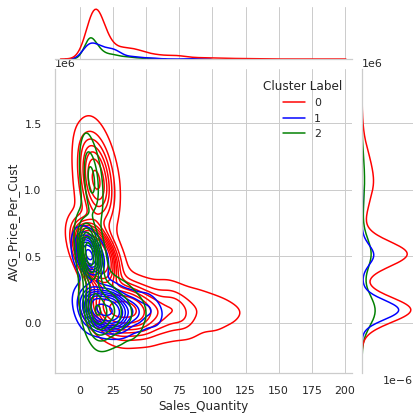

<Figure size 576x396 with 0 Axes>

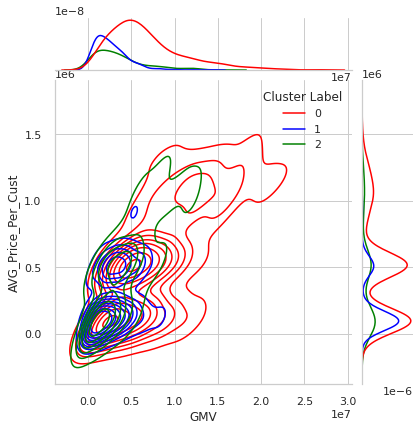

<Figure size 576x396 with 0 Axes>

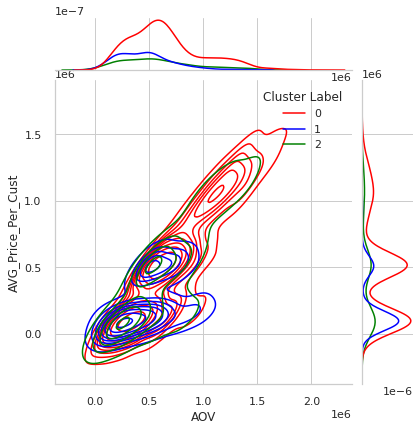

<Figure size 576x396 with 0 Axes>

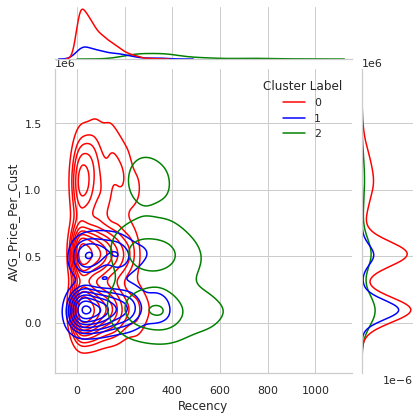

<Figure size 576x396 with 0 Axes>

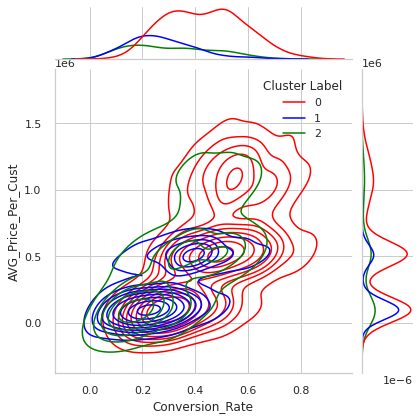

<Figure size 576x396 with 0 Axes>

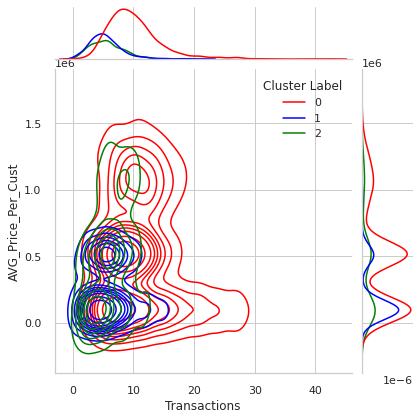

In [ ]:
Personal = ["Sales_Quantity", "GMV", "AOV", "Recency", "Conversion_Rate", "Transactions"]
palette = ["red","blue", "green"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df_clust_km[i], y=df_clust_km["AVG_Price_Per_Cust"], hue =df_clust_km["Cluster Label"], kind="kde", palette=palette)
    plt.show()